In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataHP = pd.read_csv('train_HP.csv')

In [4]:
dataset=dataHP
def getColumnTypes(dataset):
    continuas= []
    discretas = []
    categoricas = []
    for col in dataset.columns:
        if(dataset[col].dtypes=='int64' or (dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
               continuas.append(col)
            else:
               discretas.append(col)
        else: 
               categoricas.append(col) 
    return continuas, discretas, categoricas  

##Variables continuas

In [5]:
continuas, discretas, categoricas = getColumnTypes(dataHP)
print(continuas)
print(discretas)
print(categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Gar

In [6]:
from scipy import stats

##Outliers

In [7]:
dataset =dataHP
col='SalePrice'
def plotDistBoxQQ(dataset,col):
    
    plt.figure(figsize=(20,6))

    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Boxplot")

<ipython-input-7-de15b7afc963>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
<ipython-input-7-de15b7afc963>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
<ipython-input-7-de15b7afc963>:8: UserWarning: 

`distplot` is a deprecated function and wil

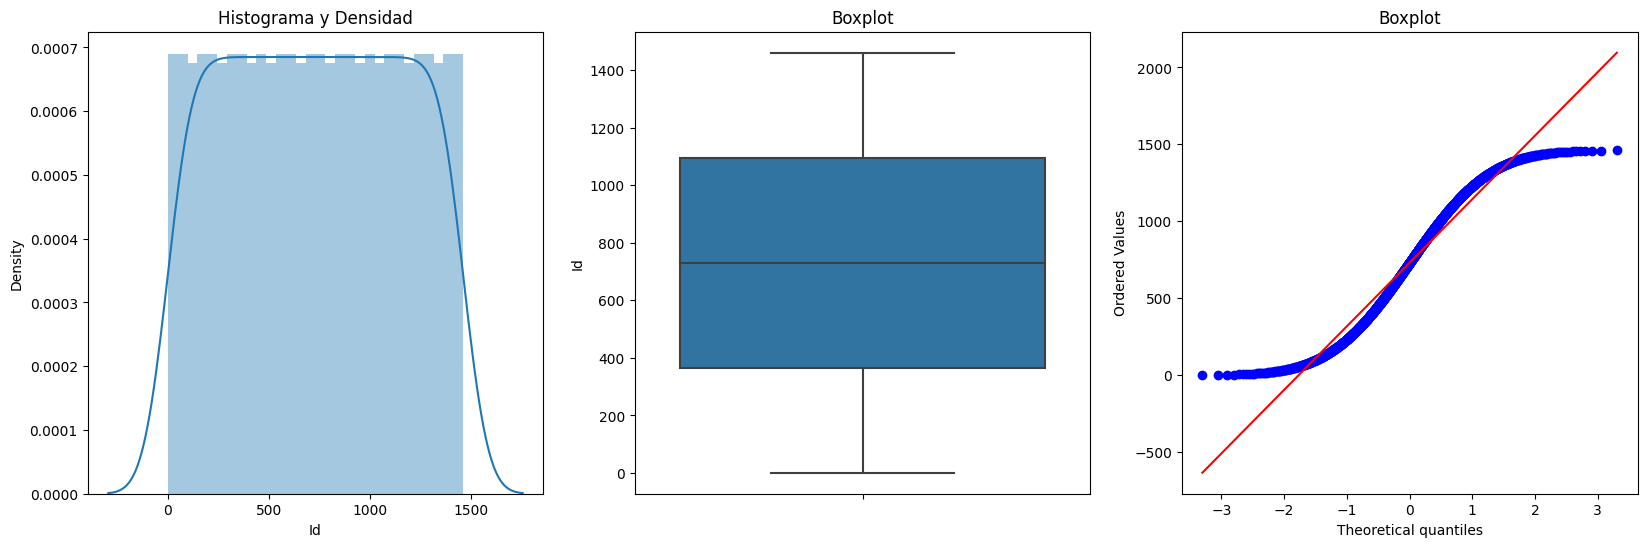

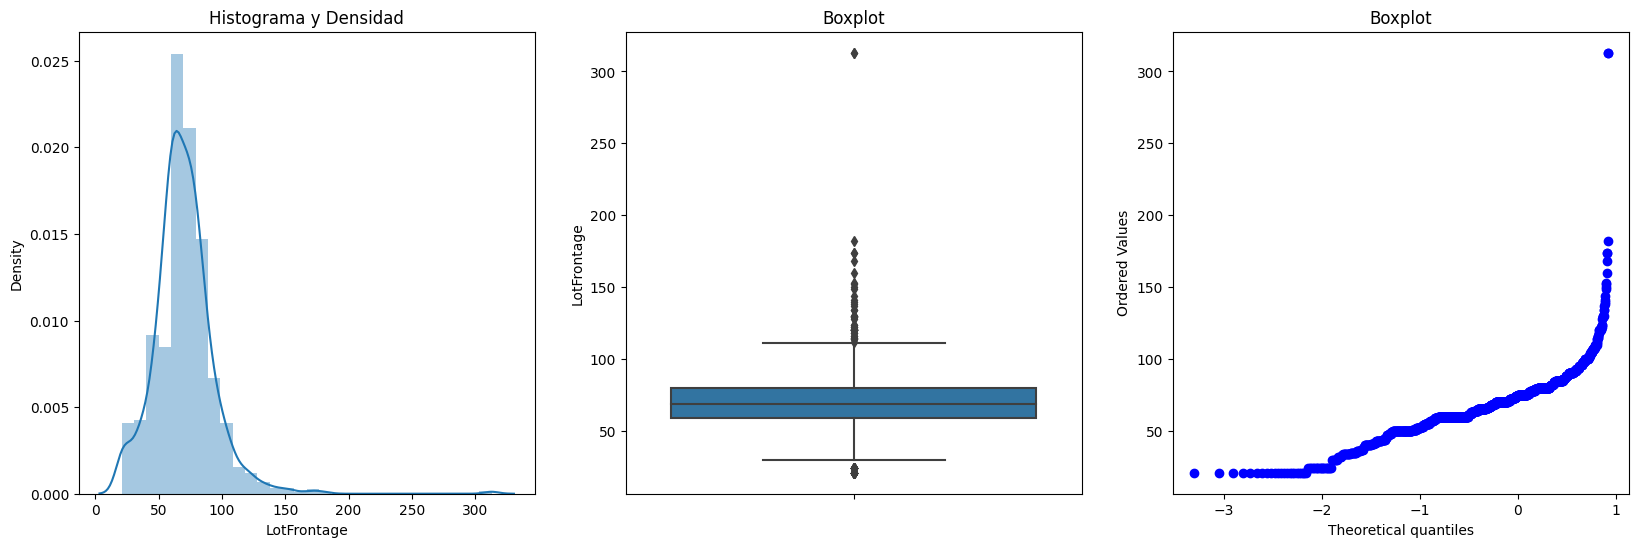

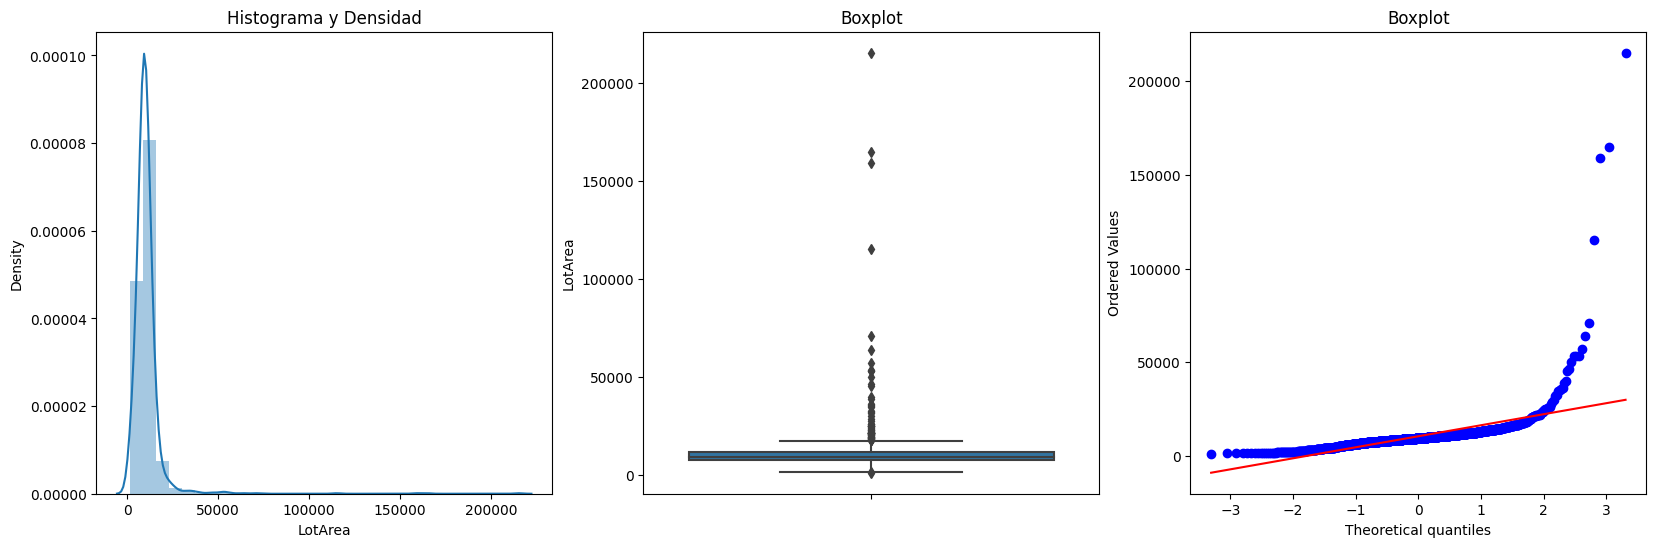

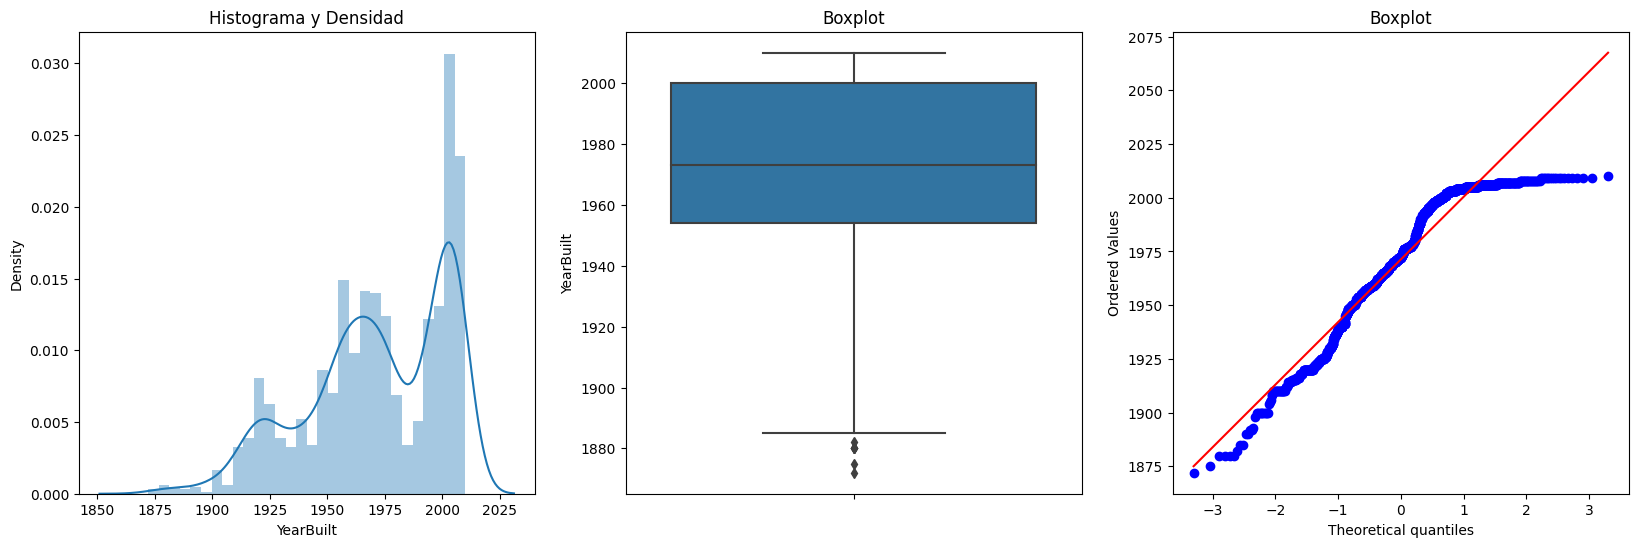

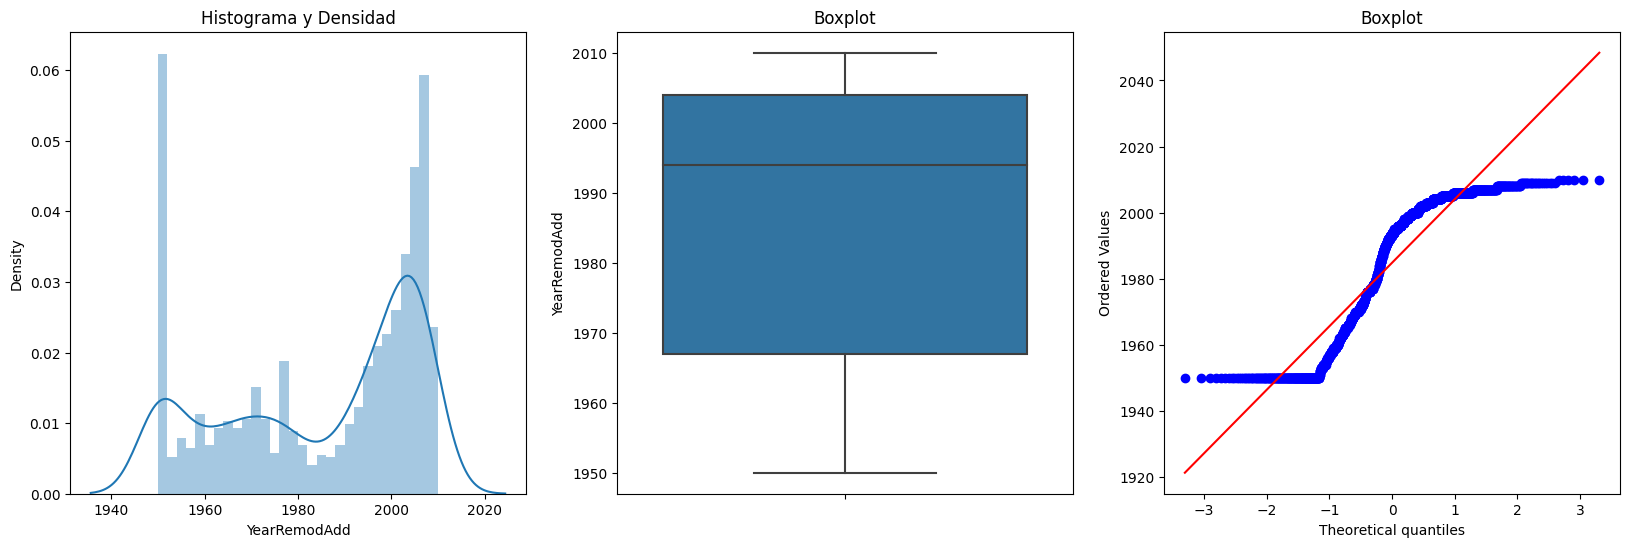

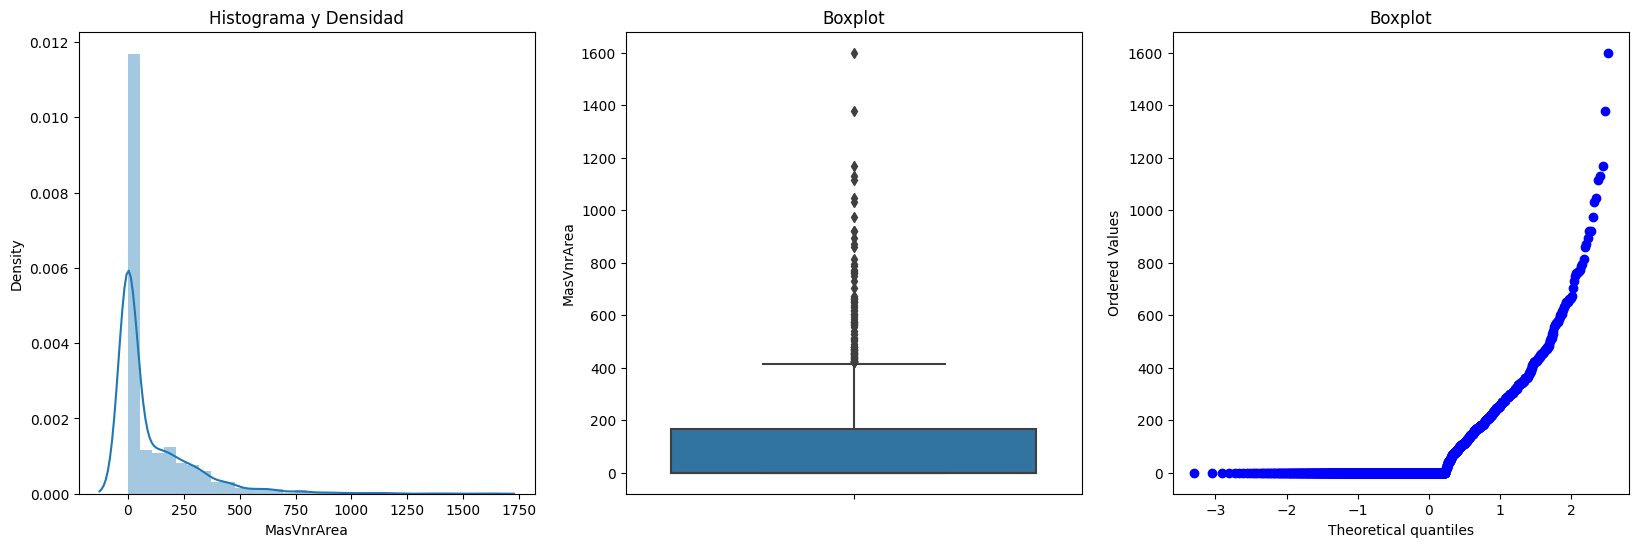

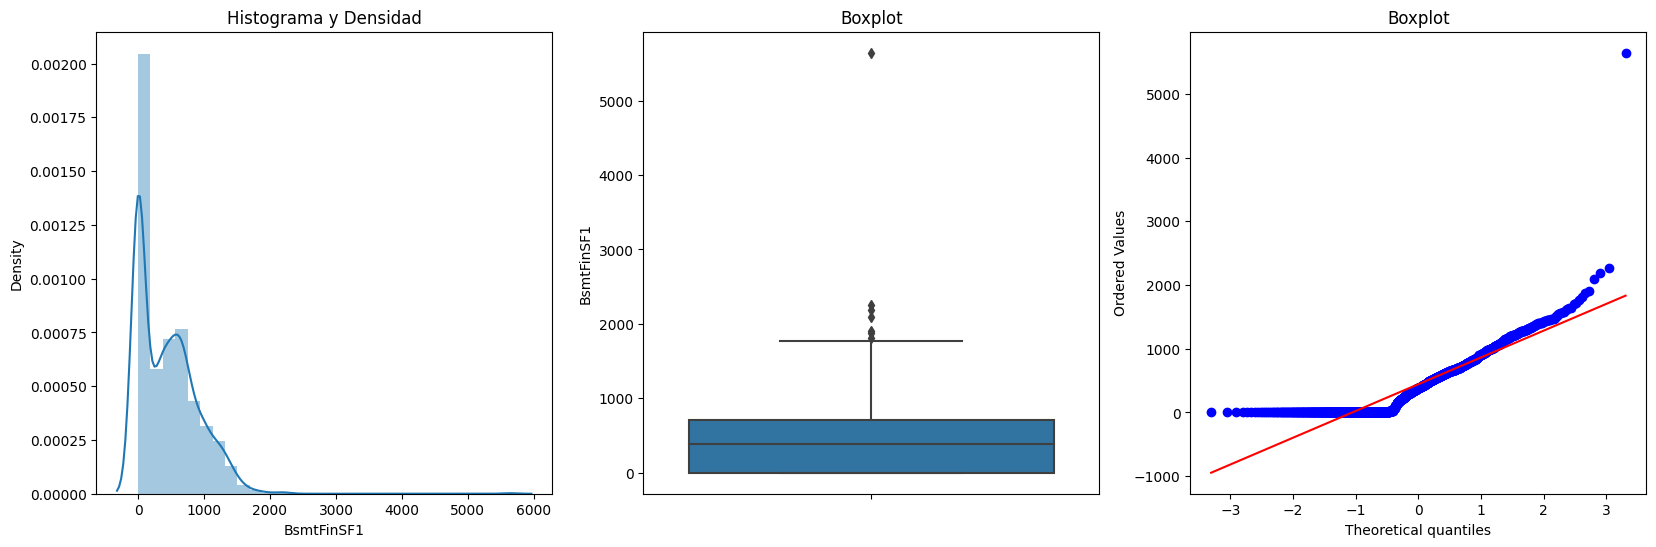

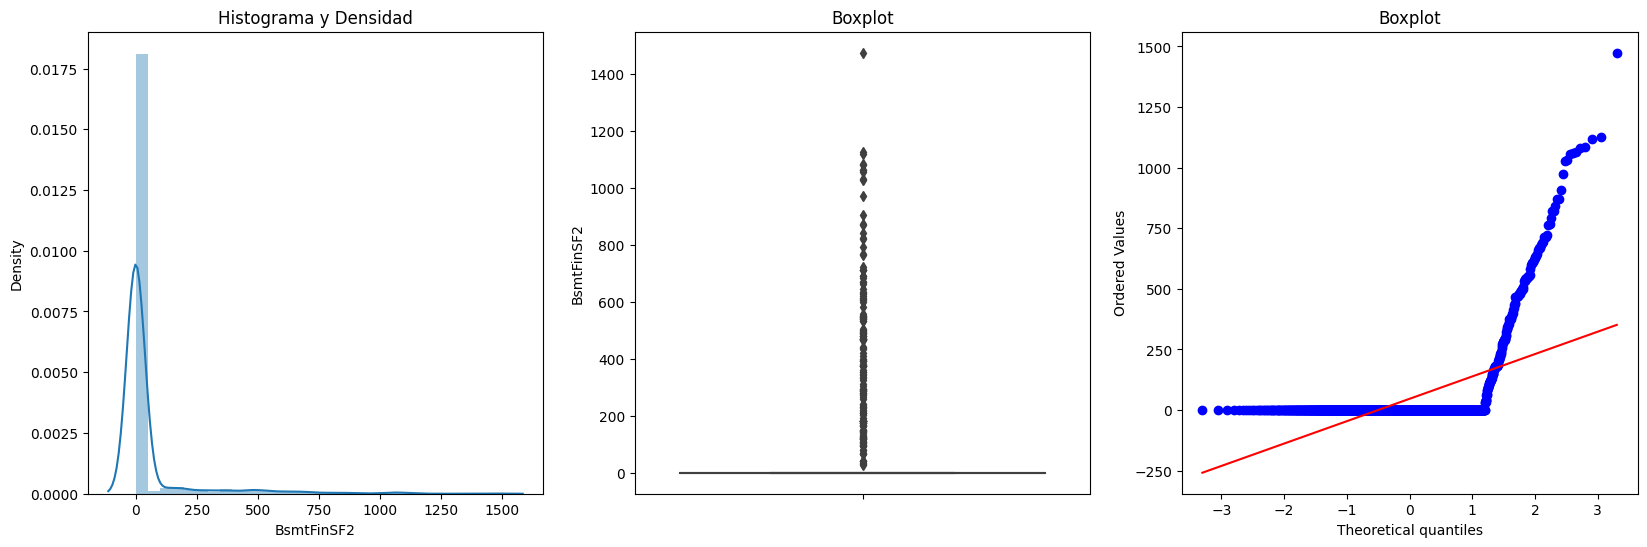

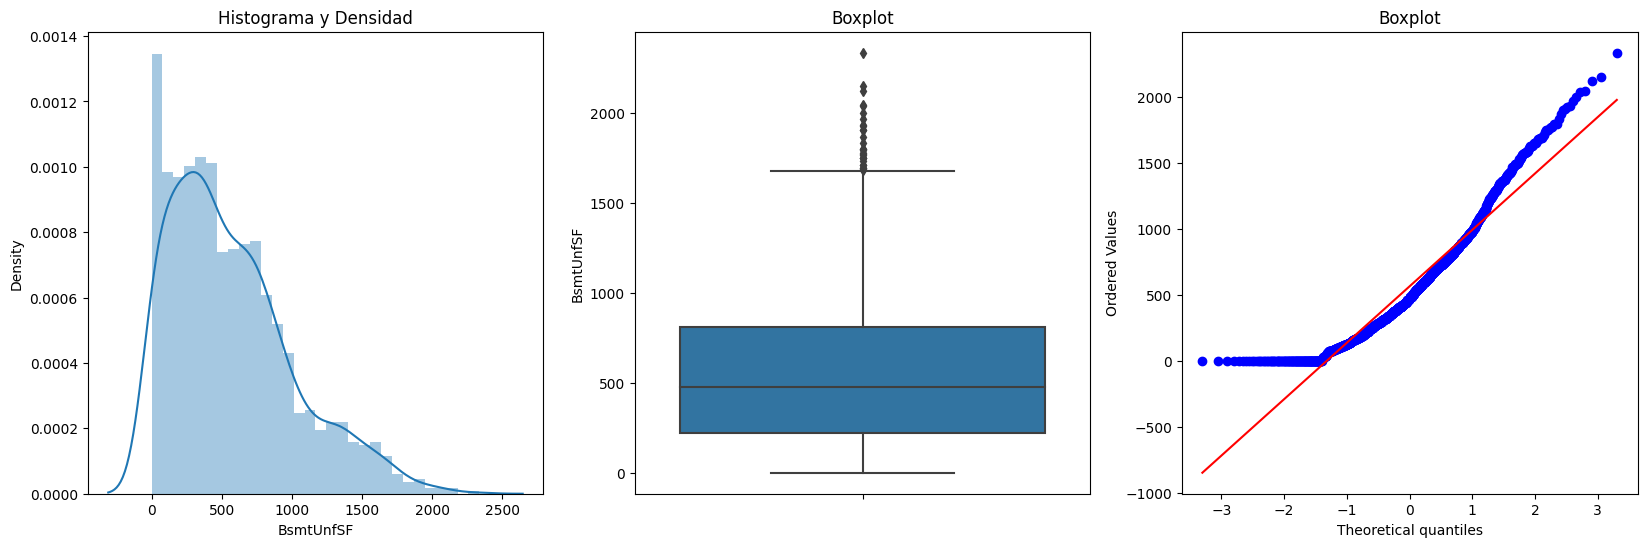

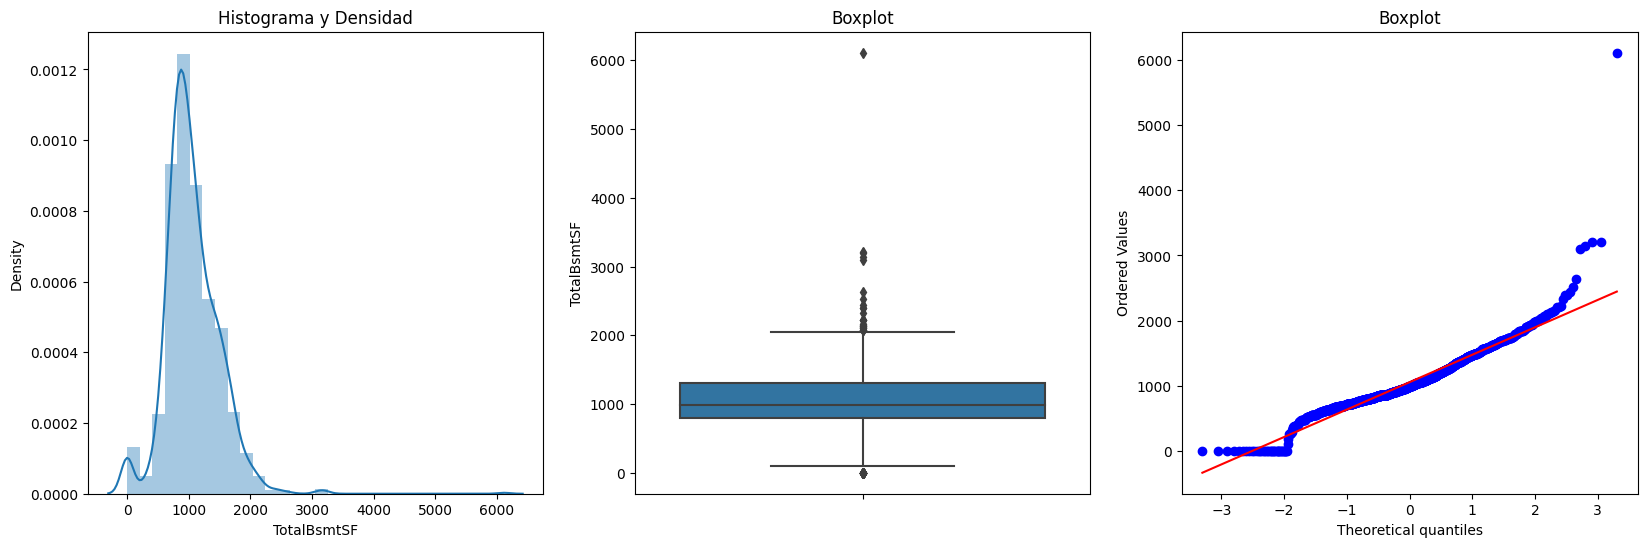

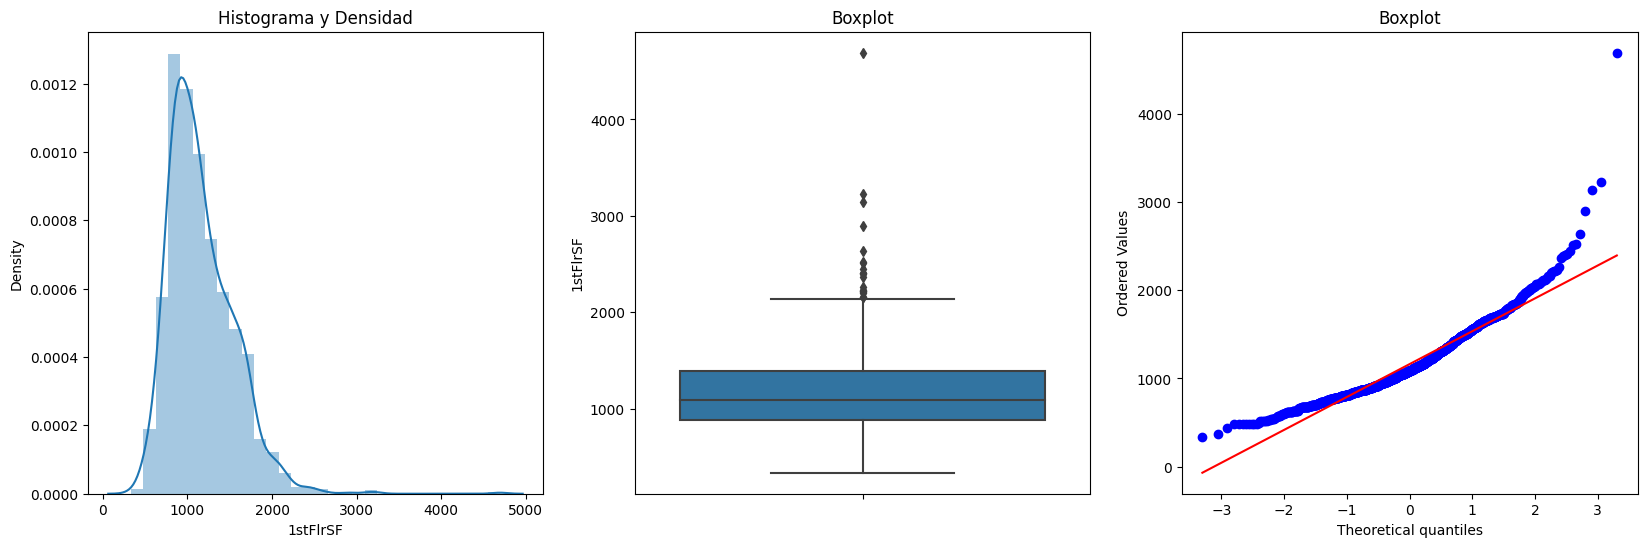

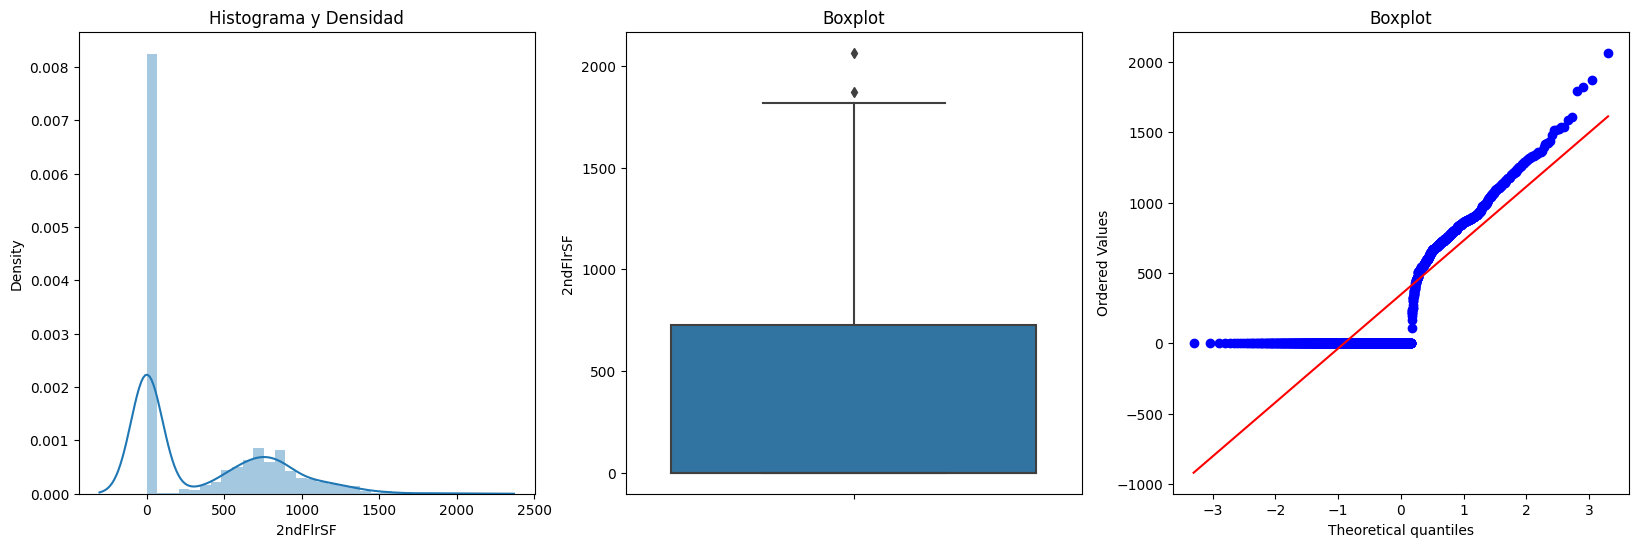

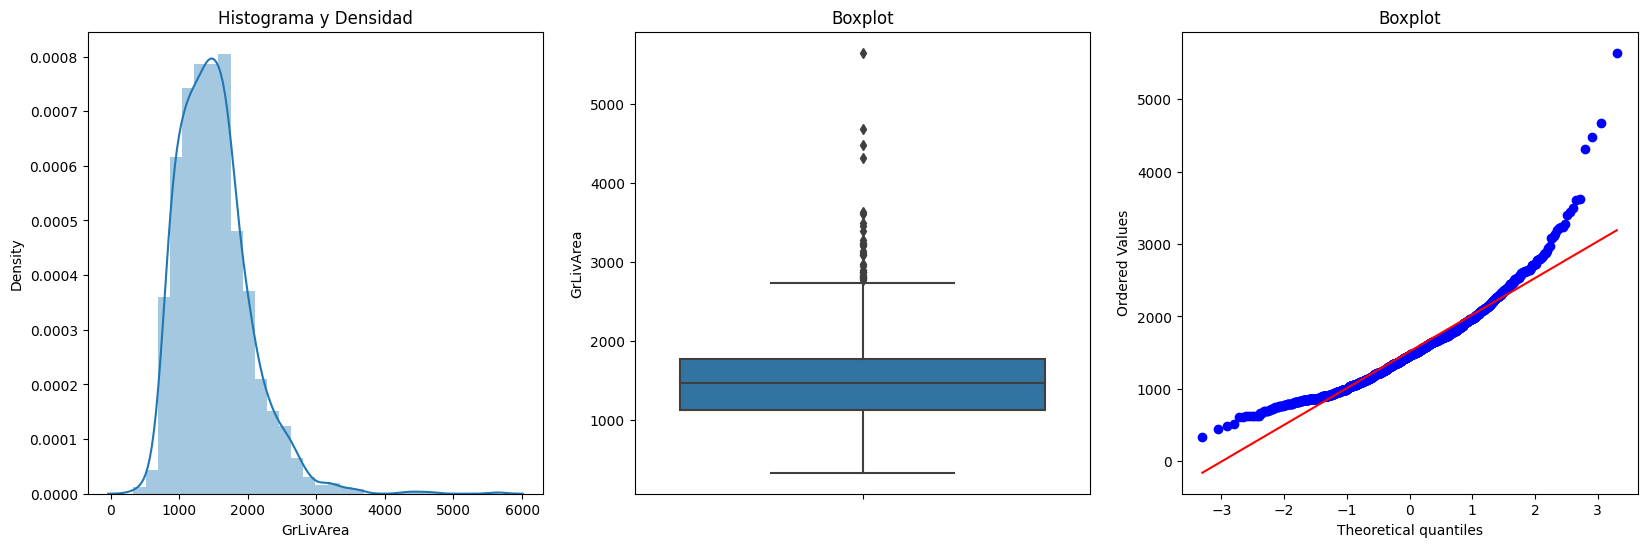

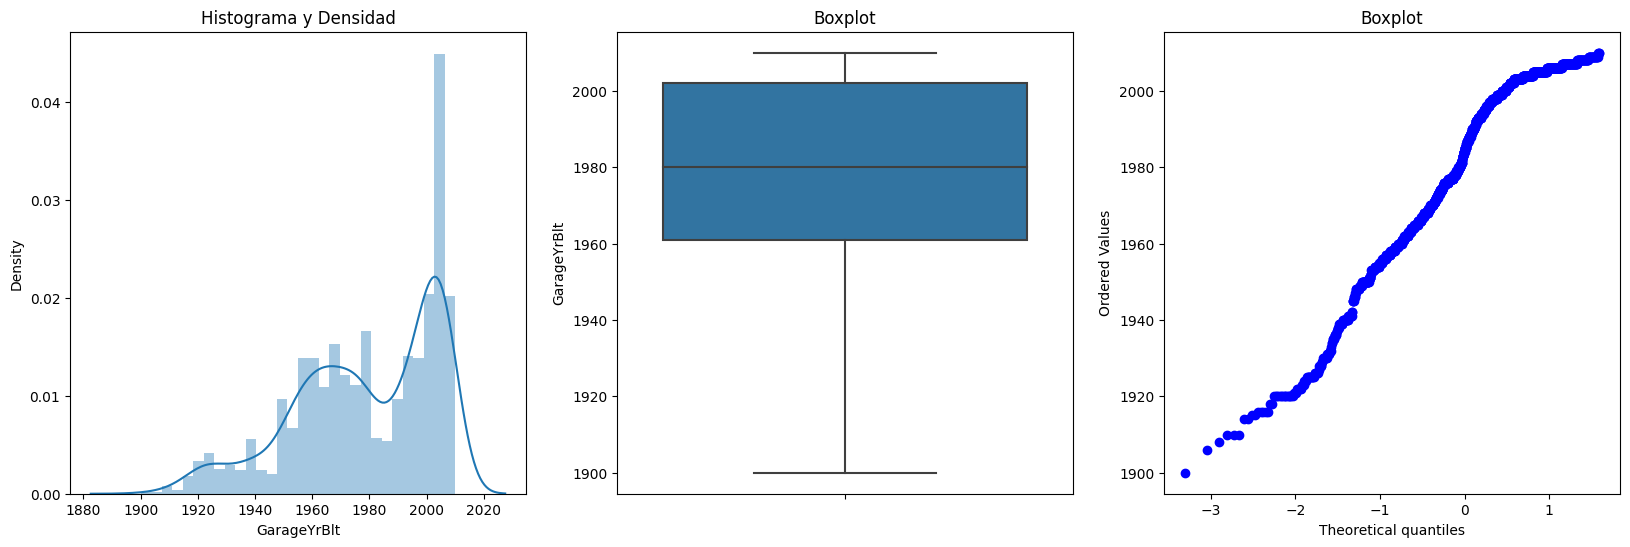

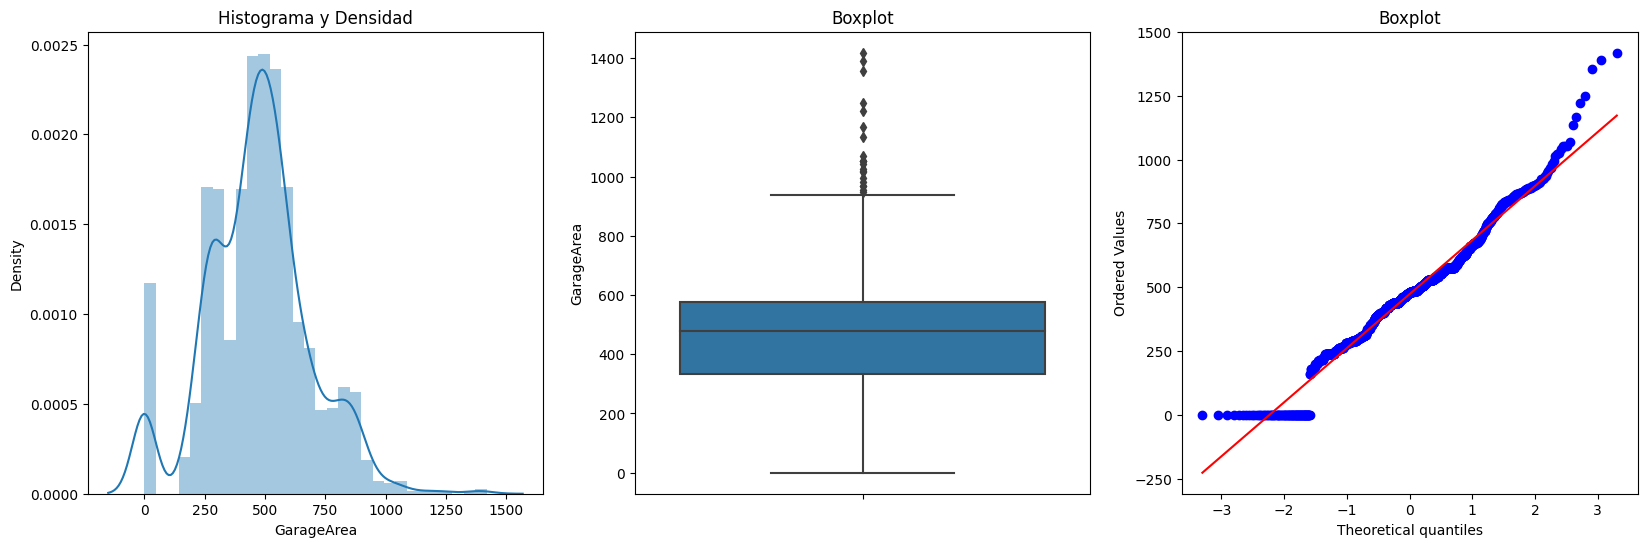

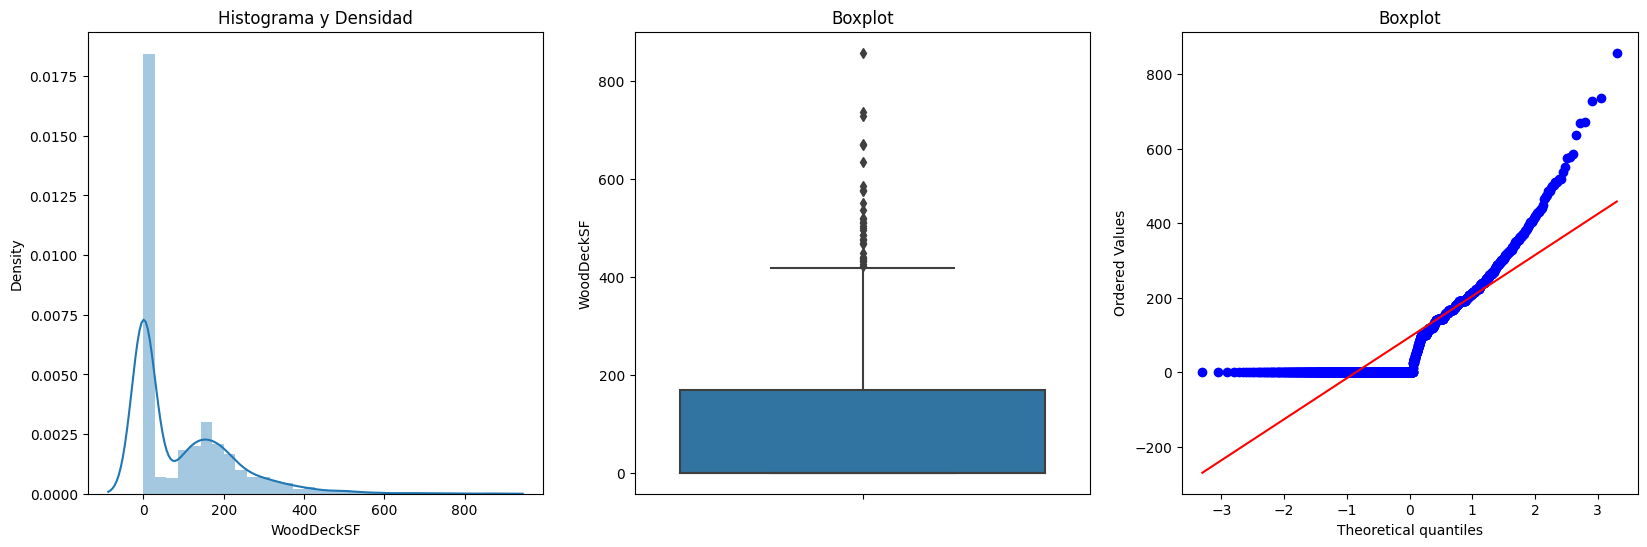

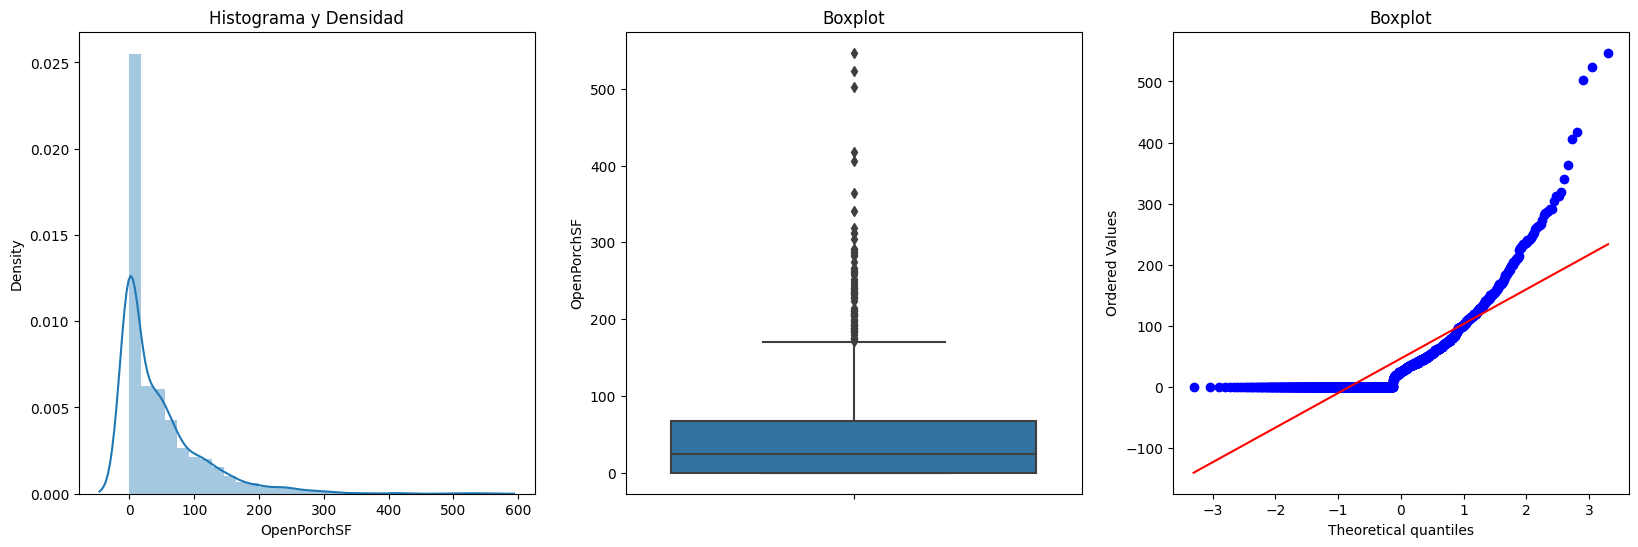

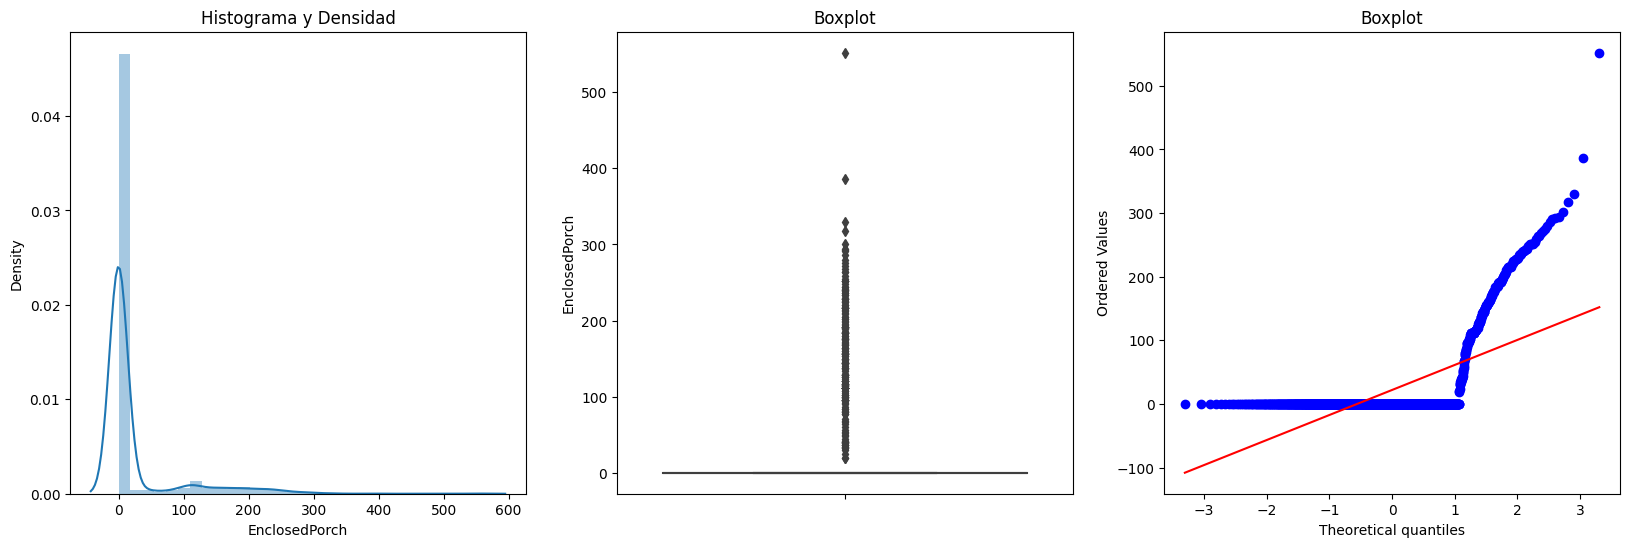

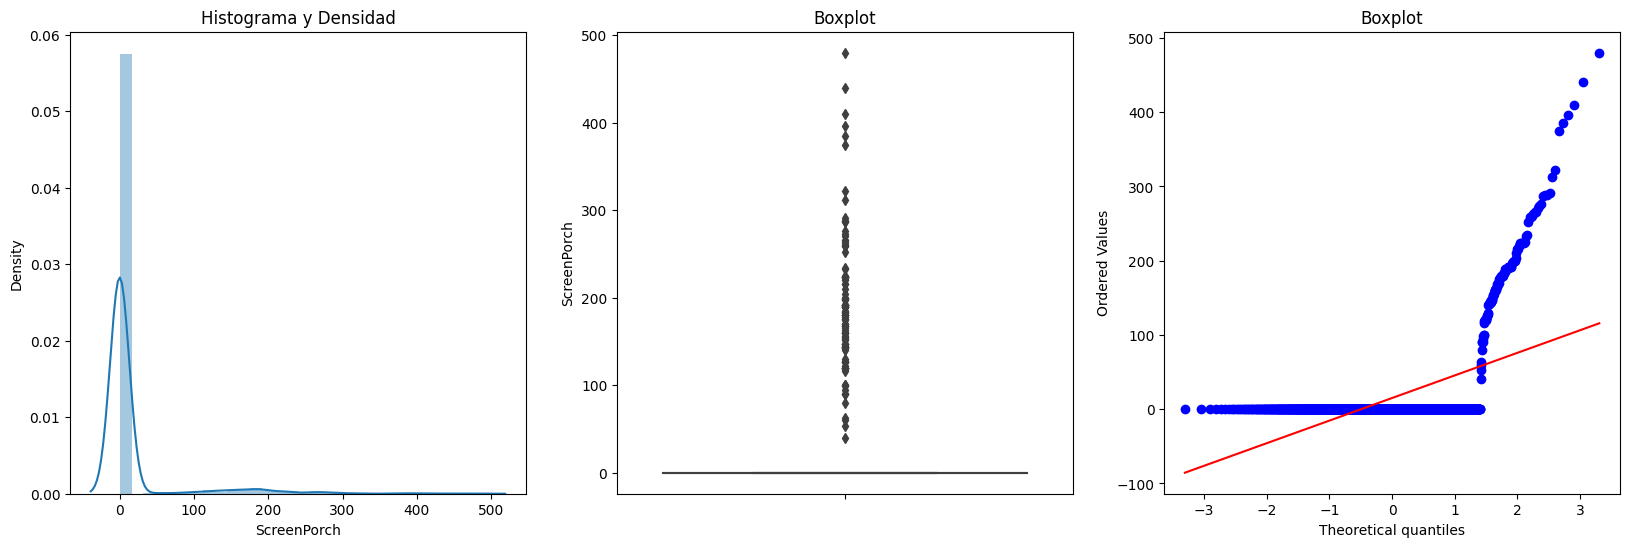

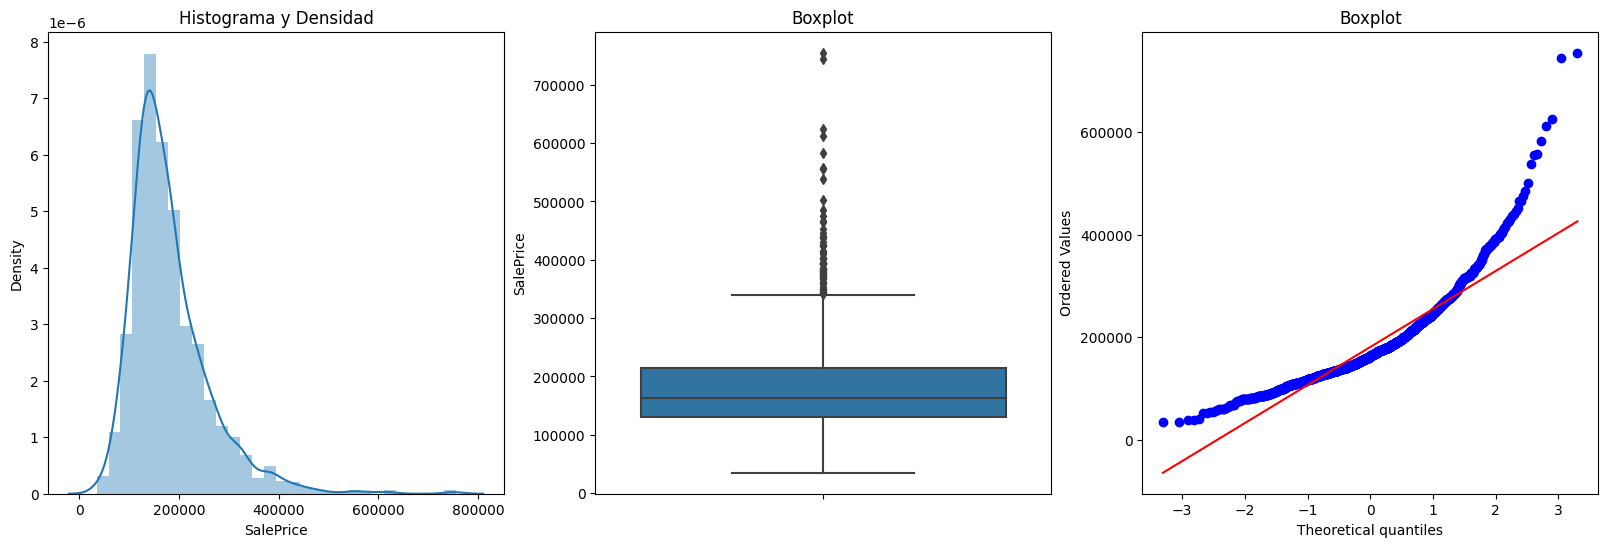

In [8]:
for col in continuas: 
    plotDistBoxQQ(dataHP,col)

##Limite inferior y superior

In [9]:
dataset = dataHP
col = 'LotArea' 
def detectOutliersLimits(dataset,col):
    IQR = dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (IQR*1.75)
    LS = dataset[col].quantile(0.75) + (IQR*1.75)
    
    return LI,LS

##Definición del capping

In [10]:
def cappingContinuas(dataset):
    continuas, _, _ = getColumnTypes(dataset)
    for col in continuas:
        LI, LS = detectOutliersLimits(dataset, col)
        dataset[col] = np.where(dataset[col] > LS, LS,
                                np.where(dataset[col] < LI, LI, dataset[col]))
        dataset[col] = np.where(dataset[col] < 0, 0, dataset[col]) 
    return dataset

In [11]:
dataHP_capped = cappingContinuas(dataHP)

<ipython-input-7-de15b7afc963>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
<ipython-input-7-de15b7afc963>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
<ipython-input-7-de15b7afc963>:8: UserWarning: 

`distplot` is a deprecated function and wil

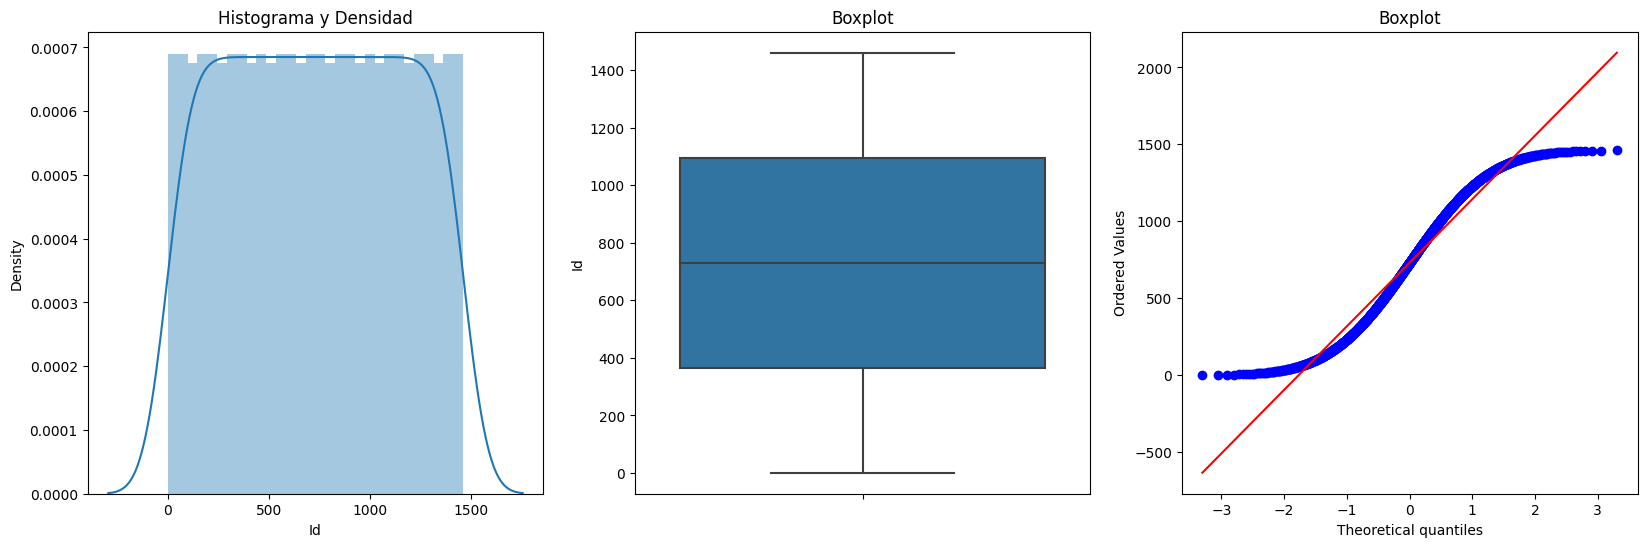

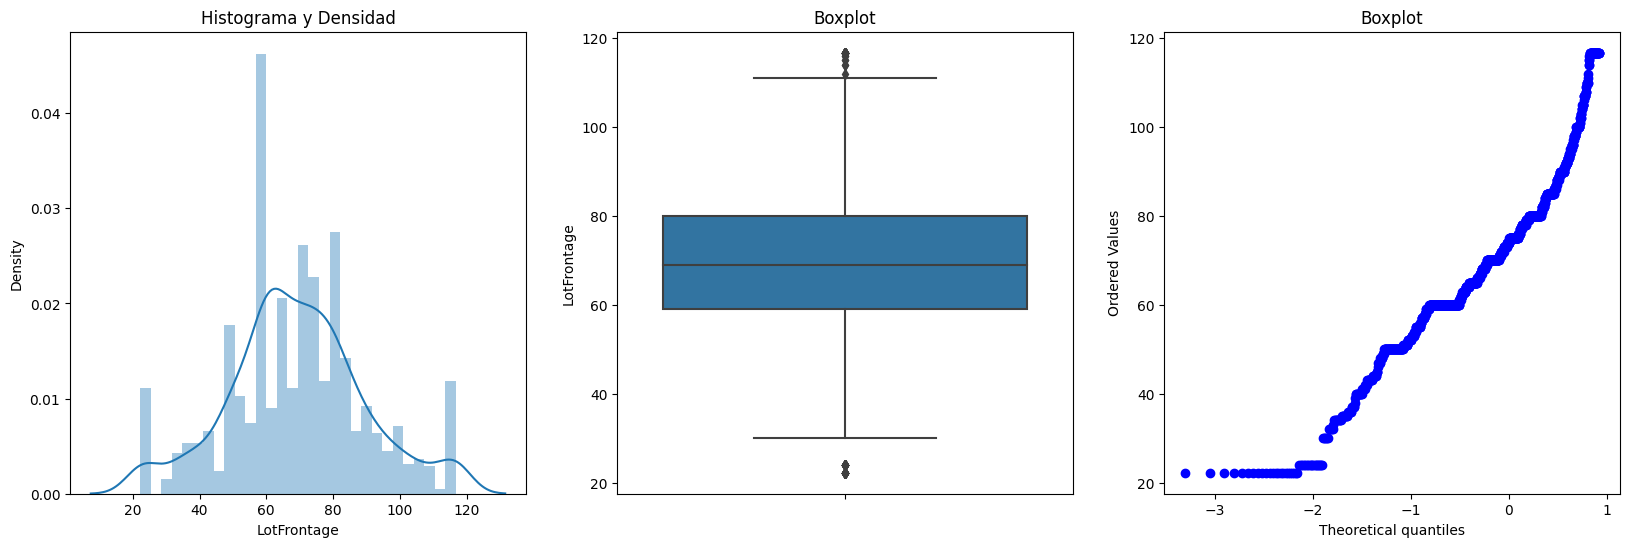

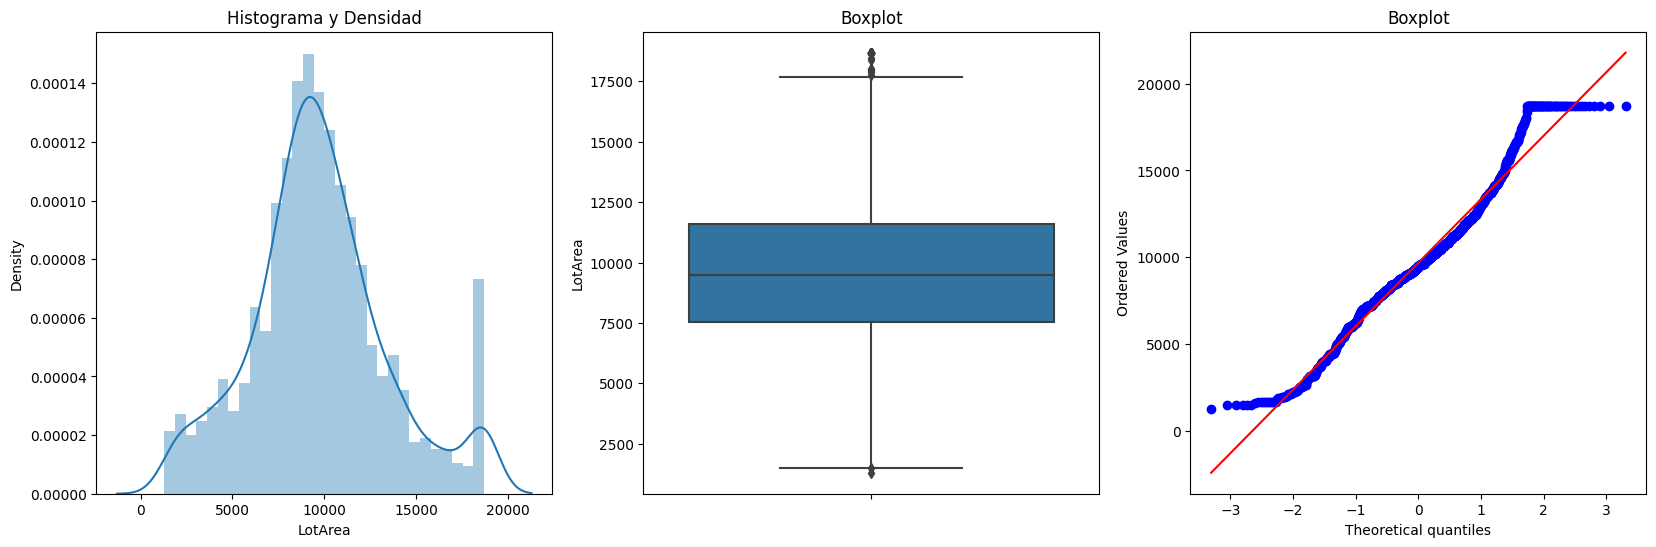

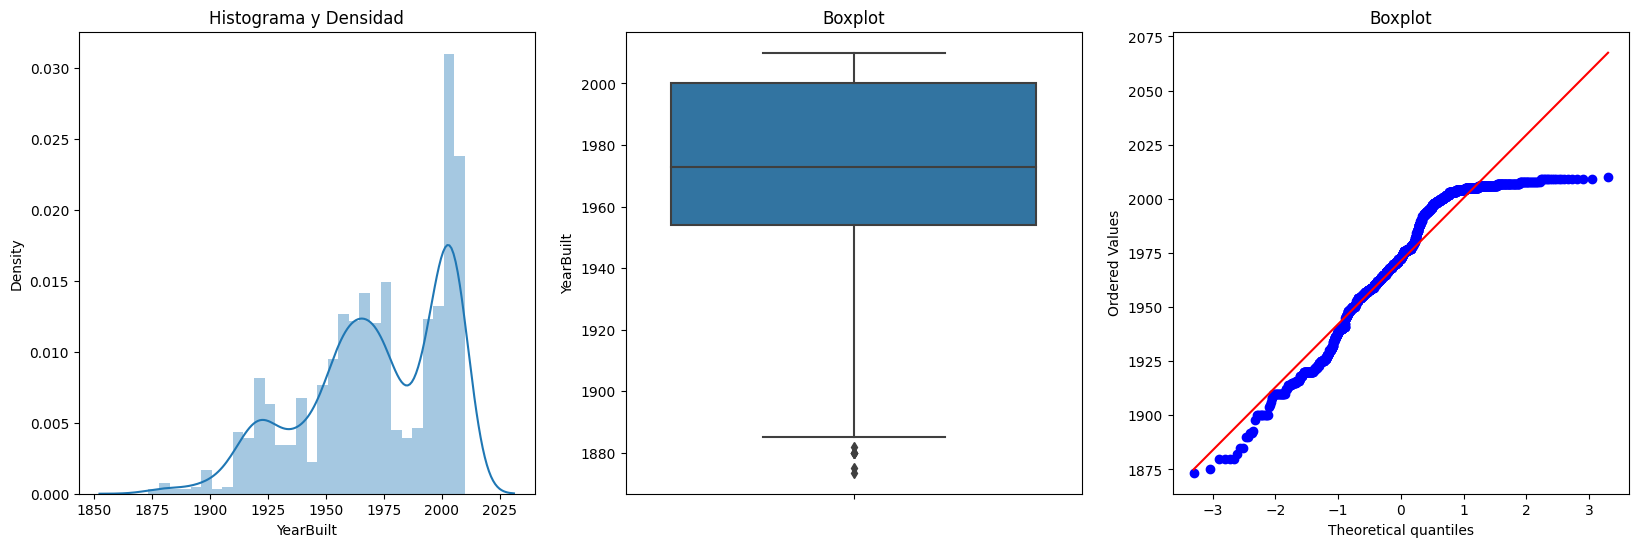

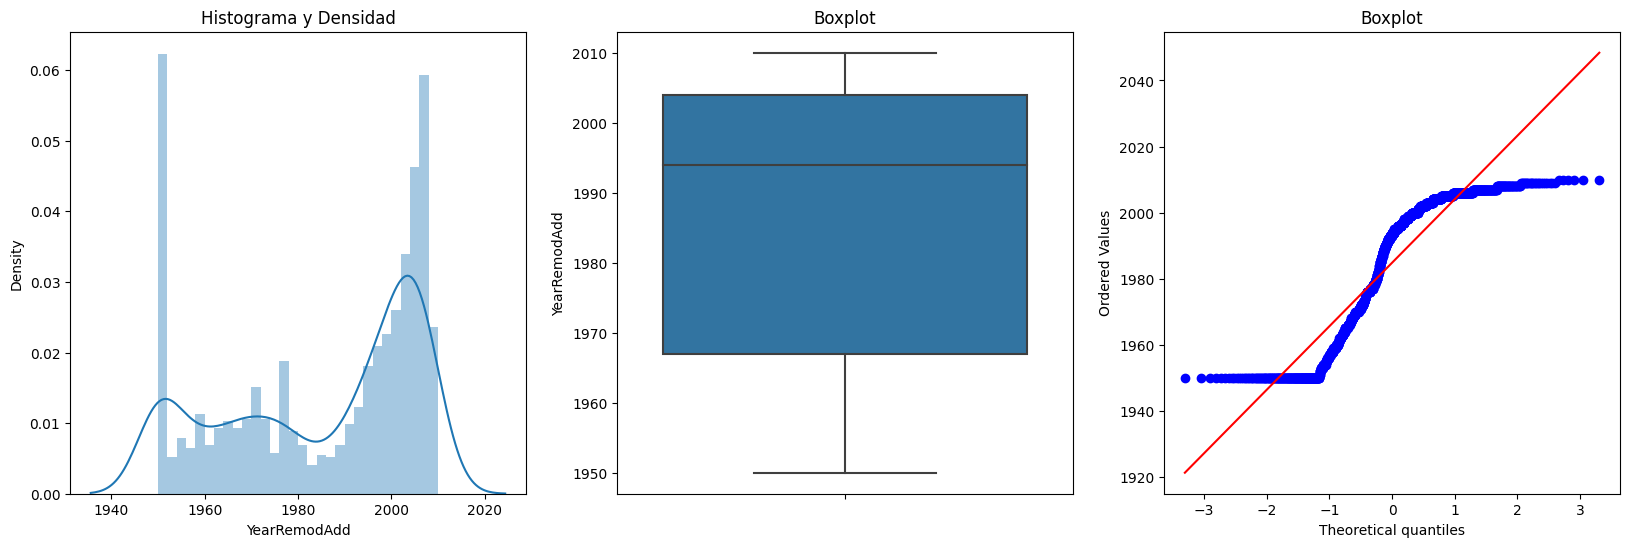

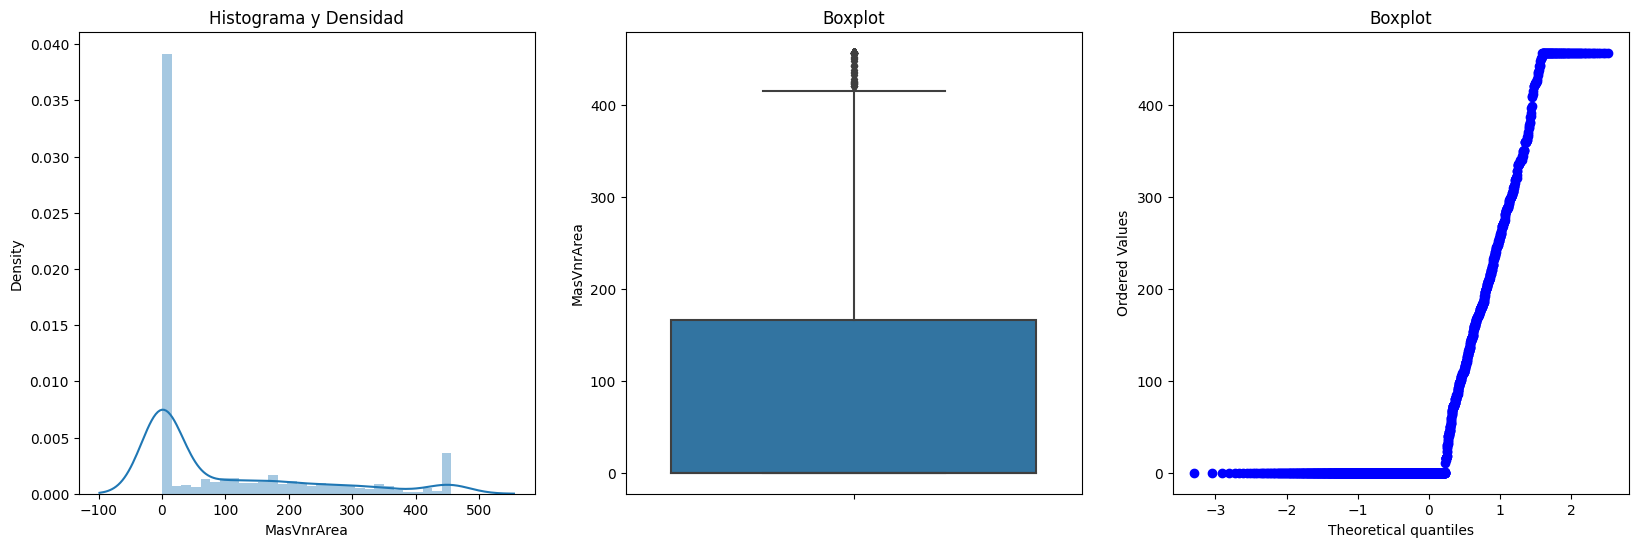

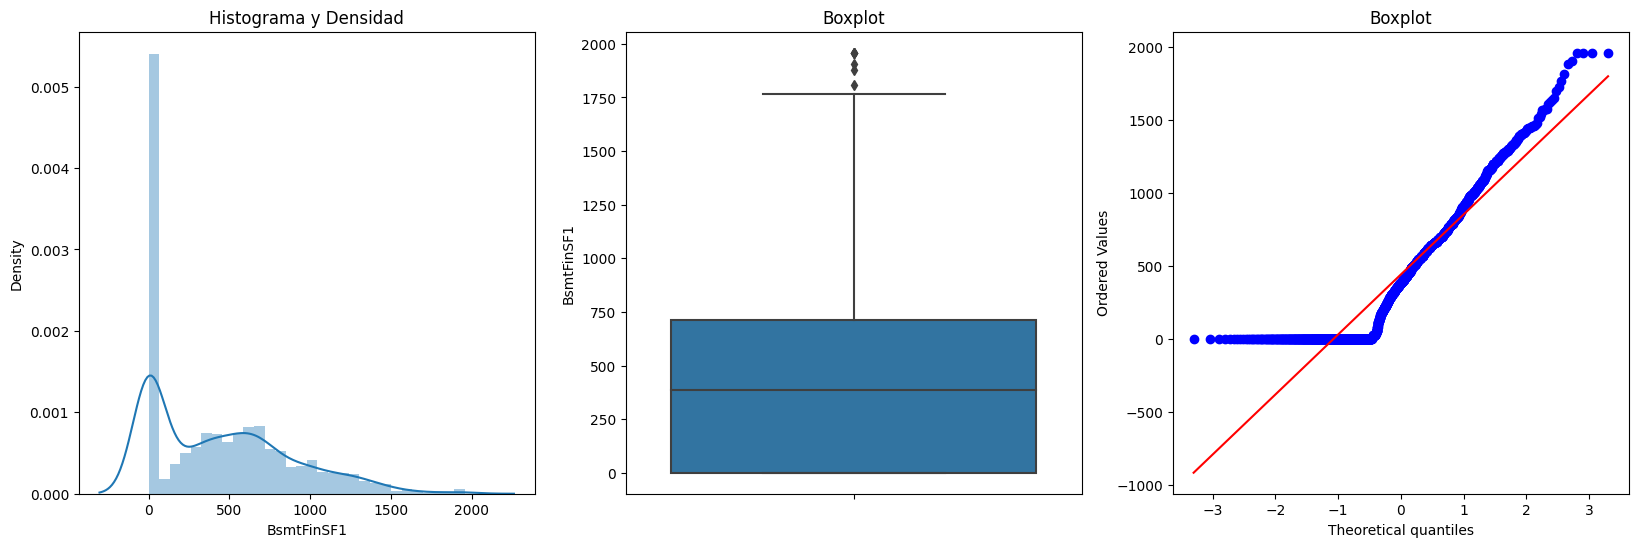

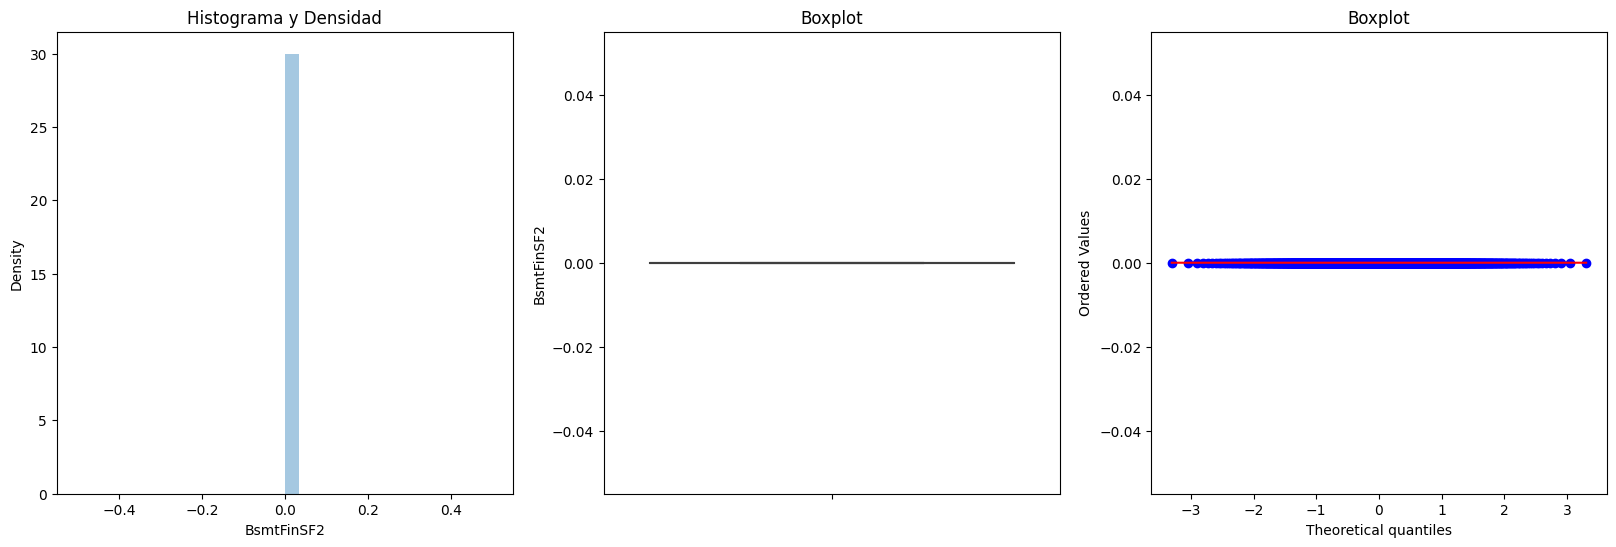

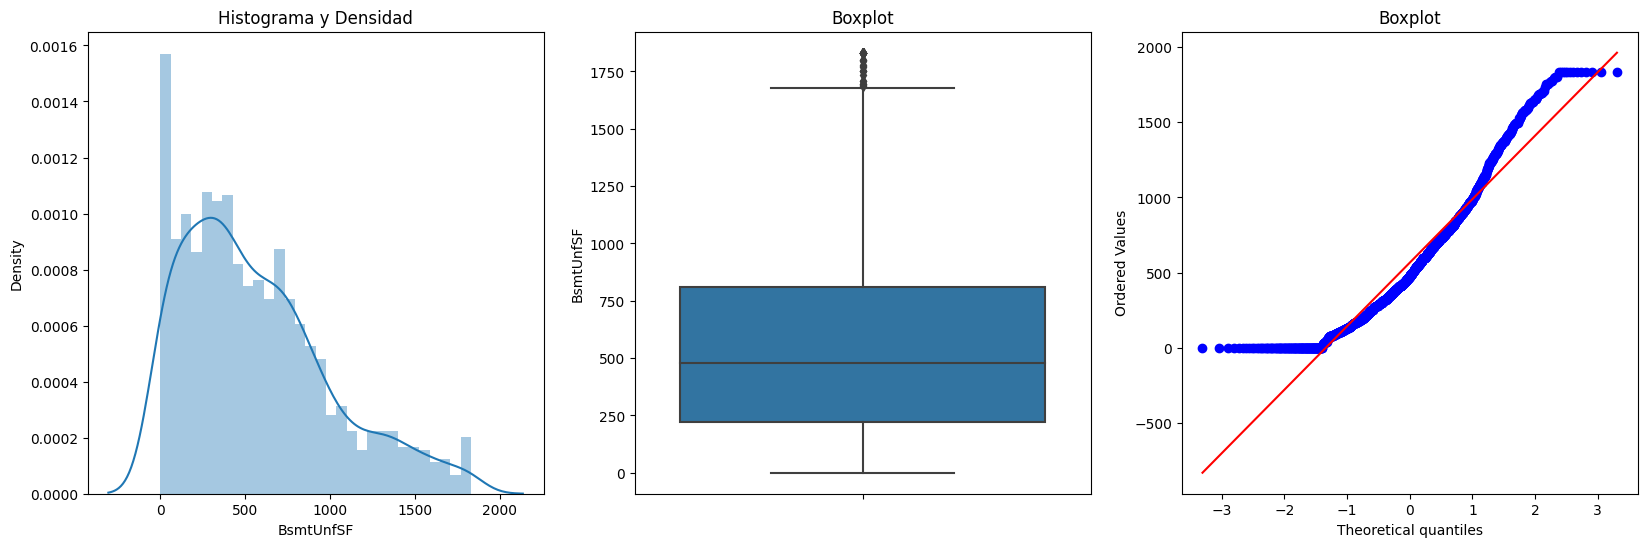

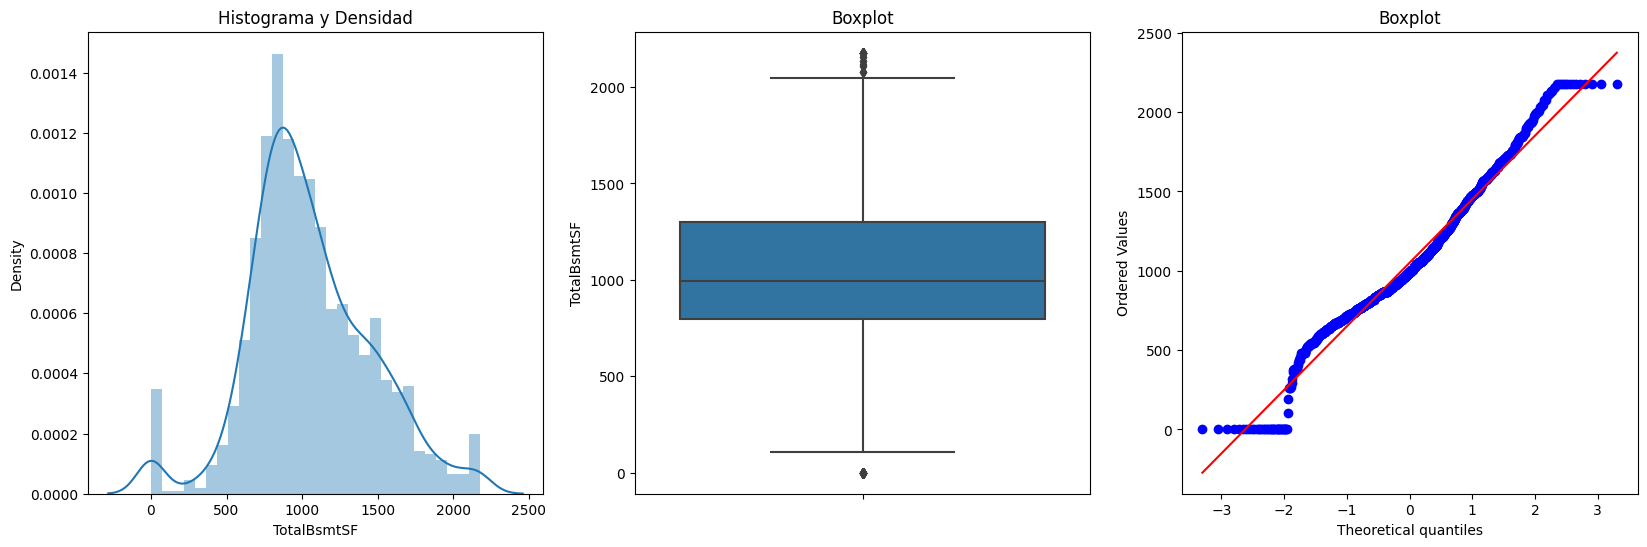

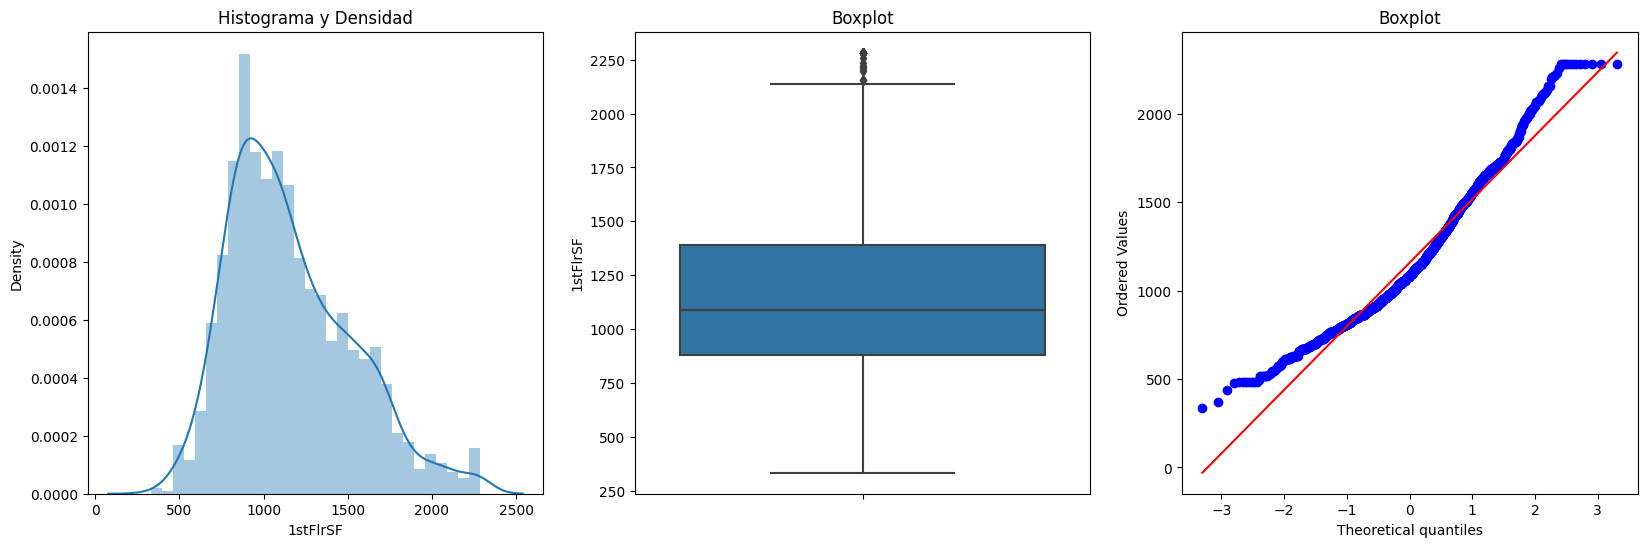

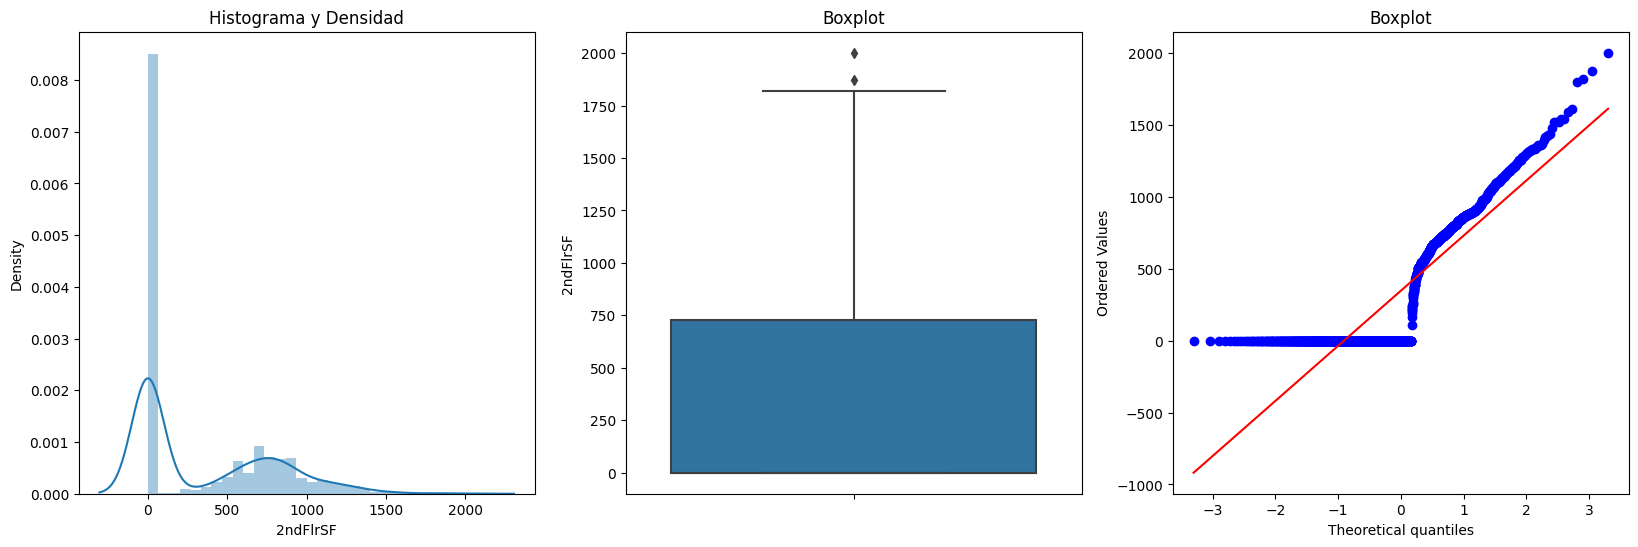

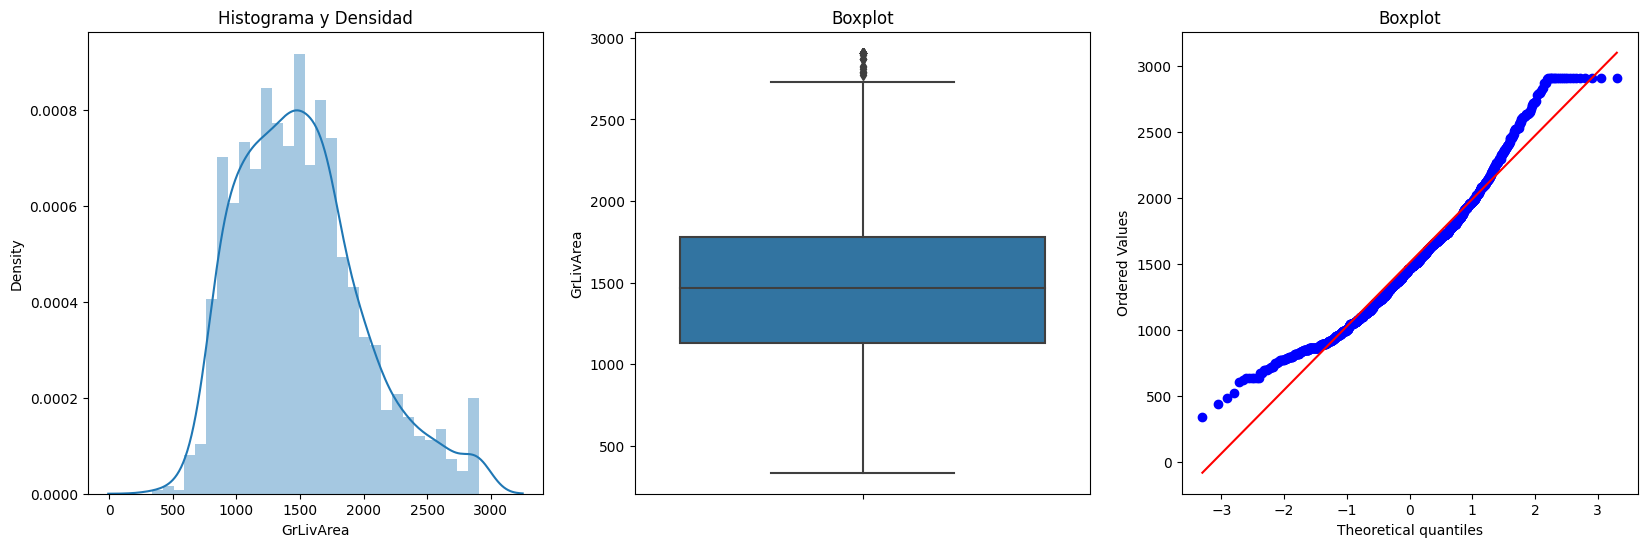

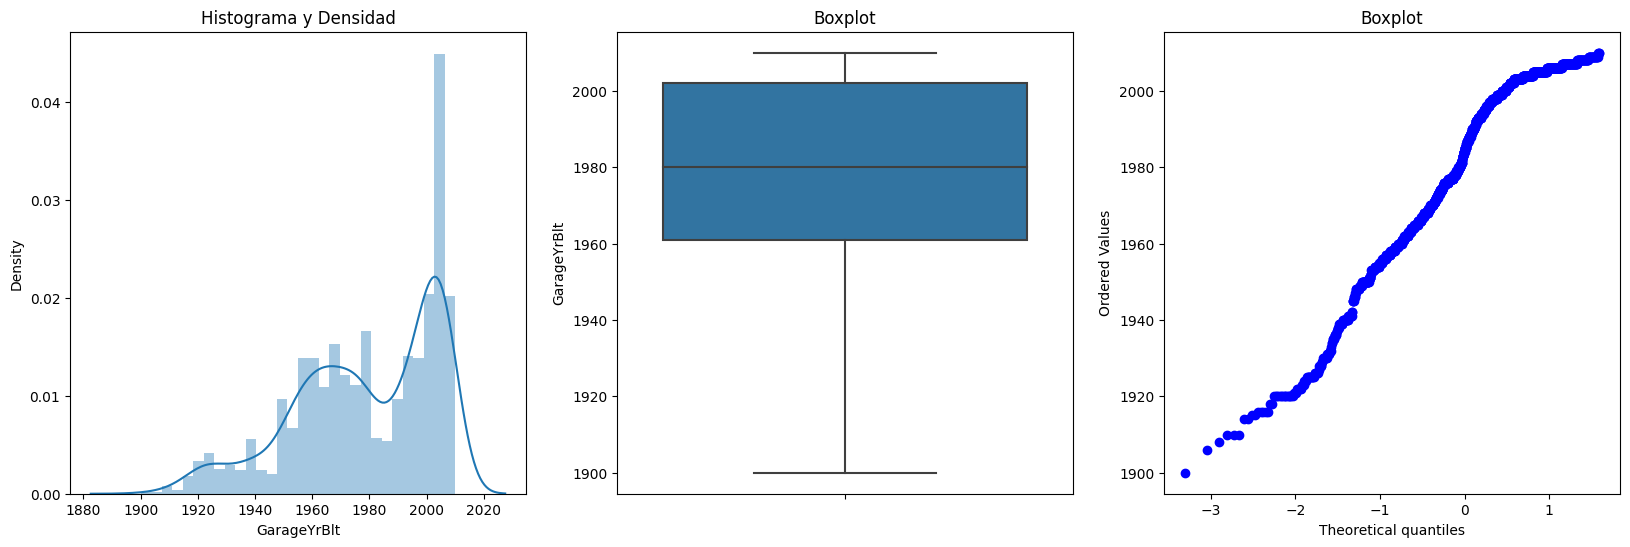

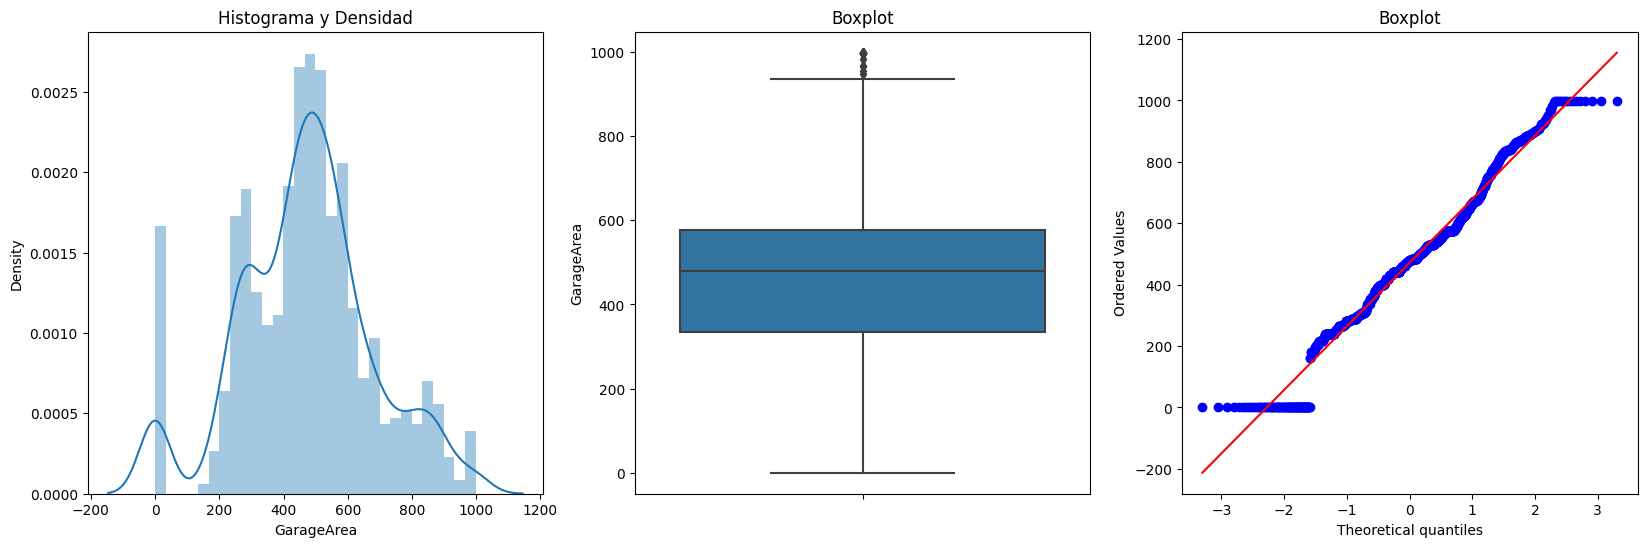

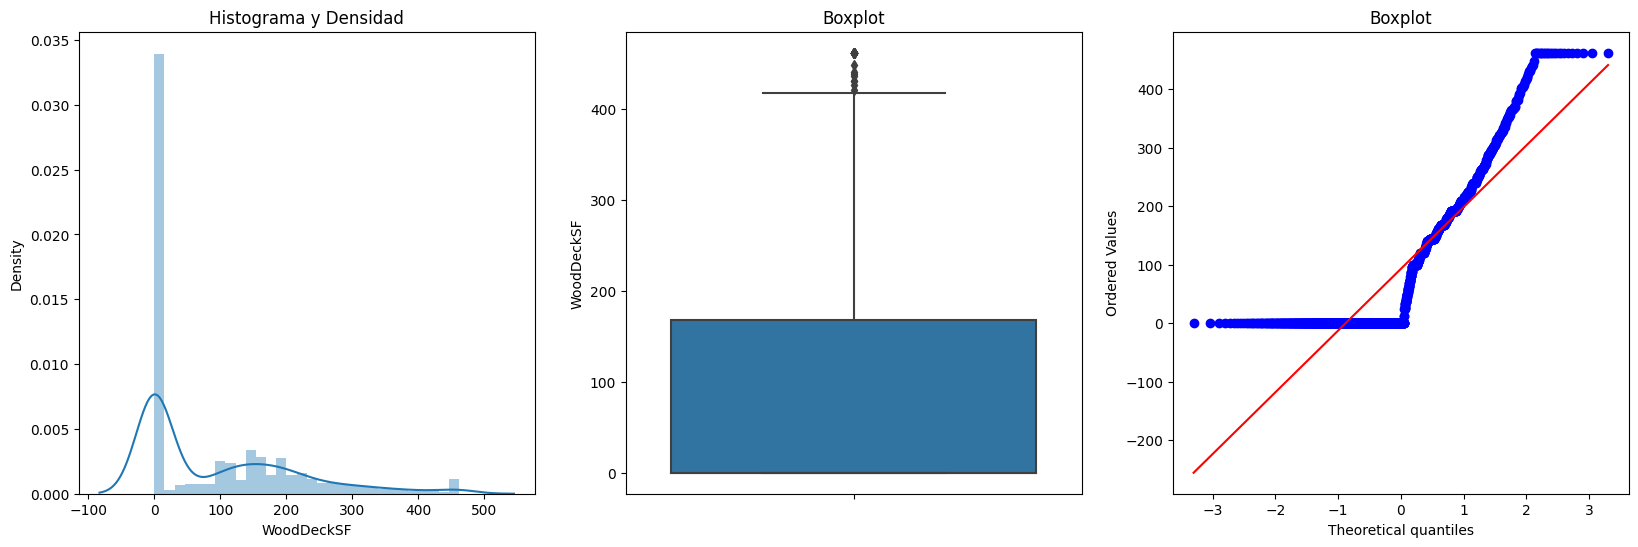

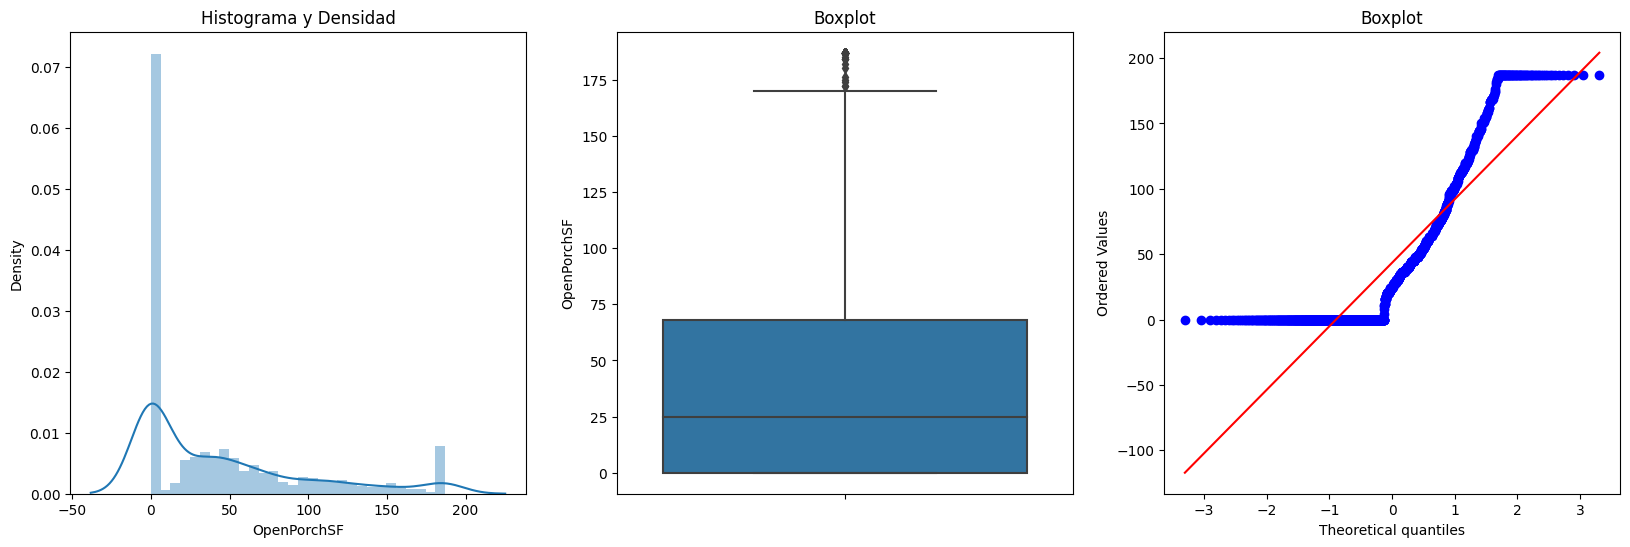

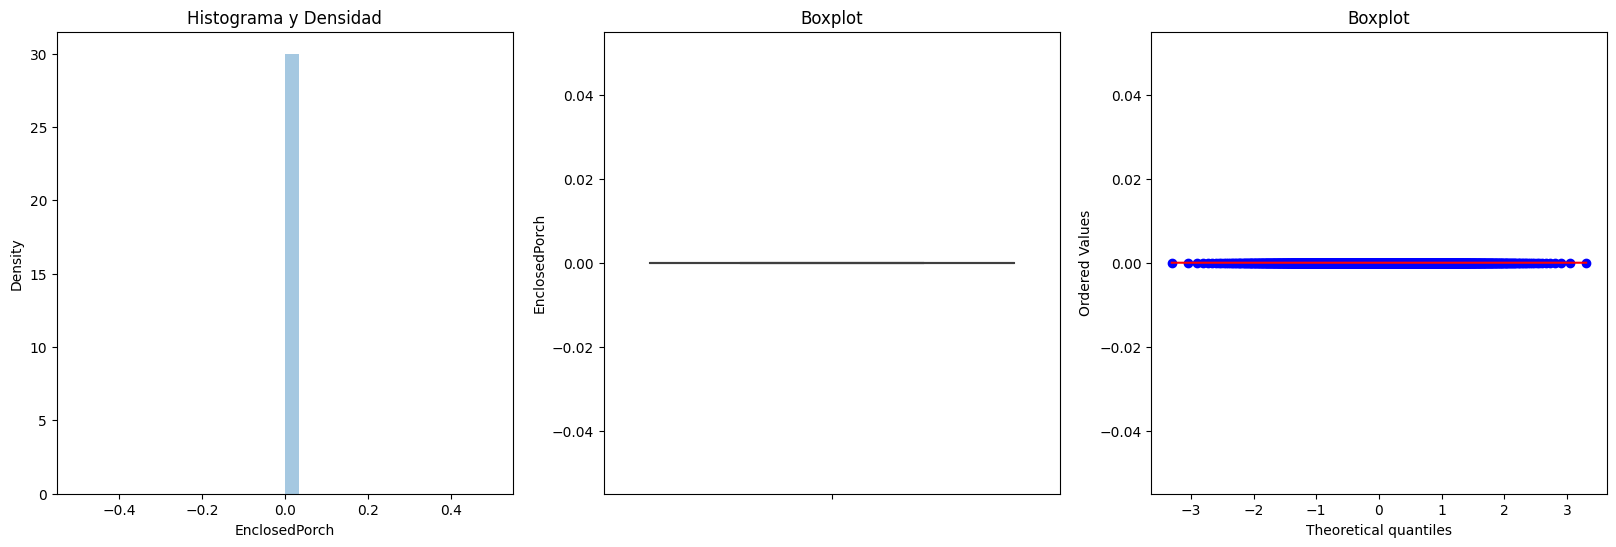

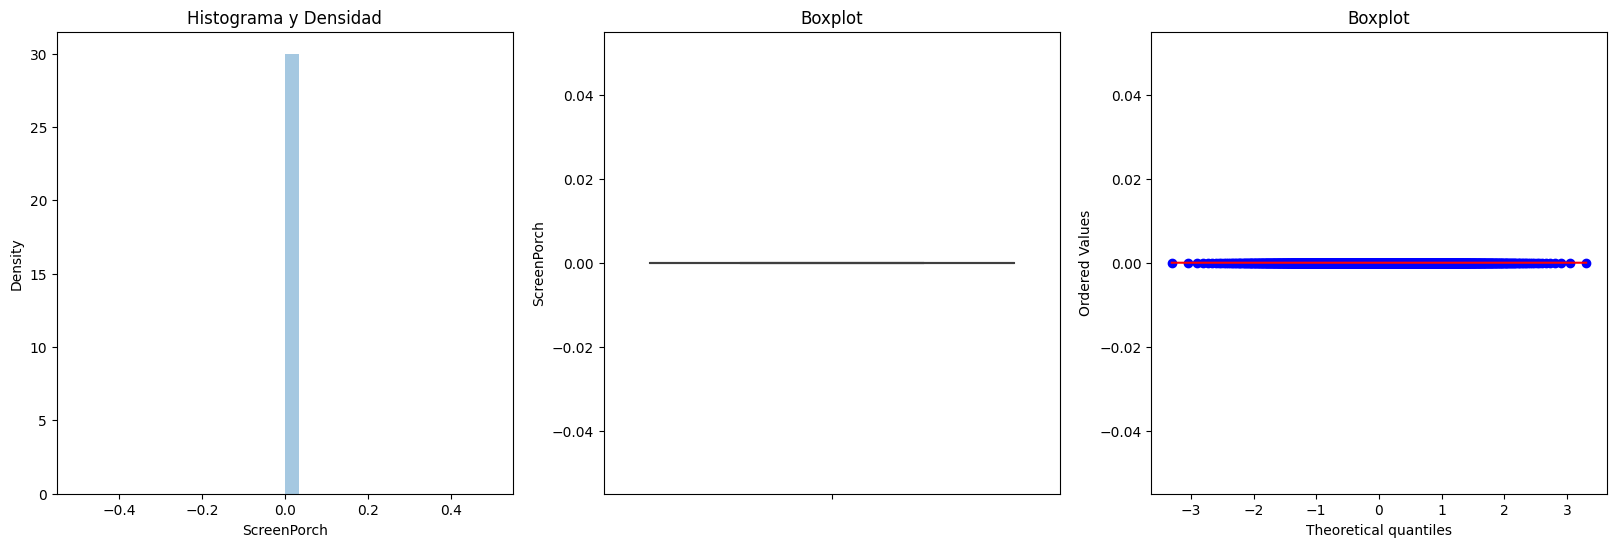

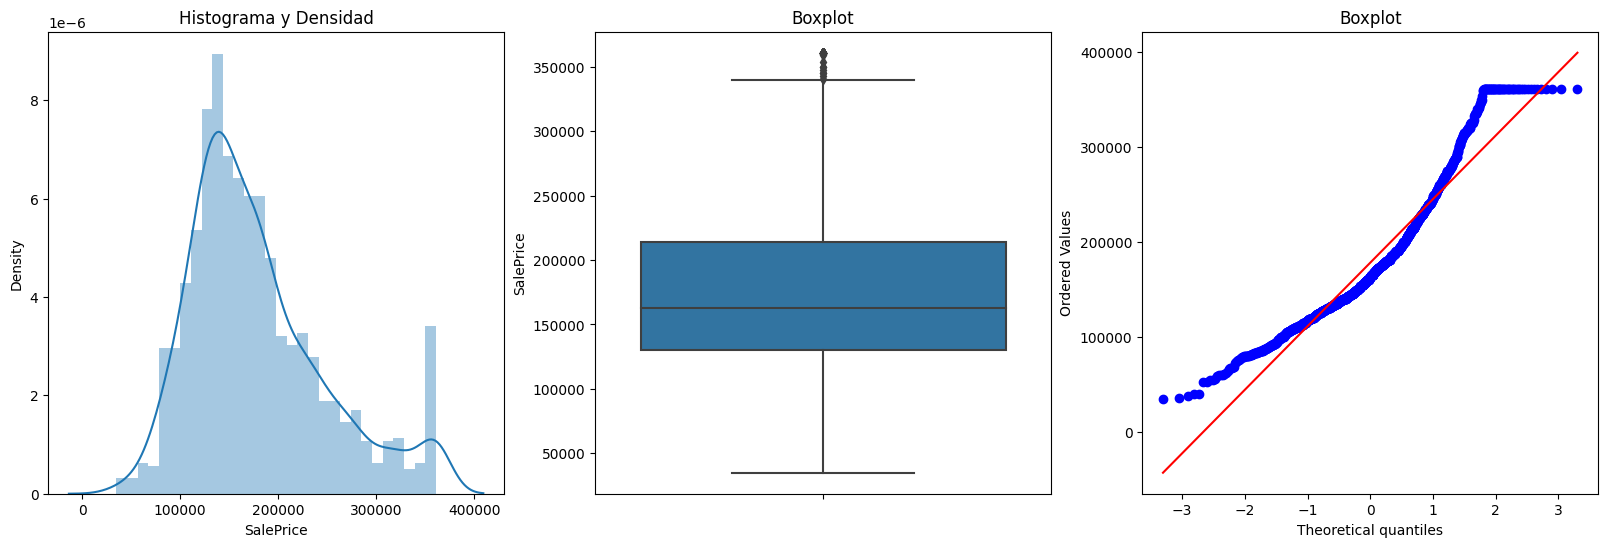

In [12]:
for col in continuas: 
    plotDistBoxQQ(dataHP,col)